In [25]:
import hhgen.plots as plots
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost
from xgboost import XGBClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.externals import joblib

In [26]:
features = ['hh_m','hh_pt', 'hh_eta','hgg_pt_hh_m','hbb_pt_hh_m','cos_theta_cs','cos_theta_hbb','cos_theta_hgg']
features+=['leadJet_pt','leadJet_eta','subleadJet_pt','subleadJet_eta']
features+=['leadPho_pt','leadPho_eta','subleadPho_pt','subleadPho_eta']

scaler=RobustScaler()

In [27]:
node_6=pd.read_hdf("node_6.hd5")
node_9=pd.read_hdf("node_9.hd5")
node_4=pd.read_hdf("node_4.hd5")
node_SM=pd.read_hdf("node_SM.hd5")

frames=[node_6,node_9,node_4,node_SM]
df=pd.concat(frames)

#indexing
random_index = np.arange(df.shape[0]) 
np.random.shuffle(random_index)
df["random_index"]=random_index 
df.set_index("random_index",inplace=True)
df.sort_index(inplace=True)

In [28]:
X = df[features]
y = df['cat'] 
w = df['weight']

#slicing data randomly into training and testing sets- we take 20% to be the testing set
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(X,y,w,test_size=0.2, random_state=12351)
w_train = np.abs(w_train)

#scale data
X_train=pd.DataFrame(scaler.fit_transform(X_train))
X_test=pd.DataFrame(scaler.transform(X_test))

clf=joblib.load('clf_opt.joblib')
rw=np.loadtxt("rw_opt.txt")

In [29]:
#reset indices
X_test.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)
w_test.reset_index(drop=True,inplace=True)

Weighted least squares for true/pred plot:  14.757
Weighted least squares for true/pred plot without category 0:  13.3483
Spread for truth/pred plot:  0.176696


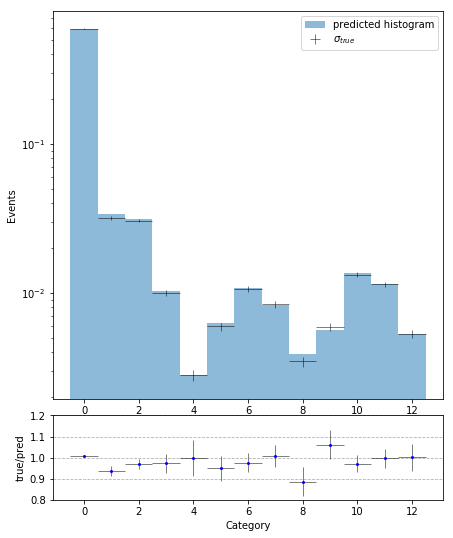

In [30]:
#predicting renormalised probability of each data in test set according to category 
y_pred_prob=clf.predict_proba(X_test)
y_pred_prob/=rw.reshape(1,-1) 
y_pred_prob/=np.sum(y_pred_prob,axis=1,keepdims=True)
#predicting weight of each data in test set according to category
y_pred_weight=np.multiply(y_pred_prob,w_test.reshape(-1,1))
#predicted categories in the form- number of test samples*number of categories
y_pred= np.arange(13).reshape(1,-1)*np.ones_like(y_pred_weight)

plots.plotting(y_pred.ravel(),y_pred_weight.ravel(),y_test,w_test)

In [31]:
#scaling data back
X_test=pd.DataFrame(scaler.inverse_transform(X_test))

In [32]:
#predicted
y_pred_weight=pd.DataFrame(y_pred_weight)

frames=[X_test,y_test,w_test]
df = pd.concat(frames,axis=1,ignore_index=True)

df.columns=['hh_m','hh_pt', 'hh_eta','hgg_pt_hh_m','hbb_pt_hh_m','cos_theta_cs','cos_theta_hbb','cos_theta_hgg',
            'leadJet_pt','leadJet_eta','subleadJet_pt','subleadJet_eta','leadPho_pt','leadPho_eta',
            'subleadPho_pt','subleadPho_eta','cat_true','w_true']

Total number of event in pred hist:  0.582552
Total number of event in true hist:  0.585447


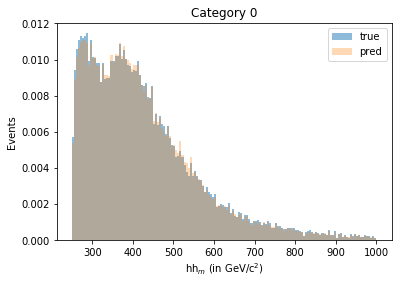

Total number of event in pred hist:  0.0297662
Total number of event in true hist:  0.0282984


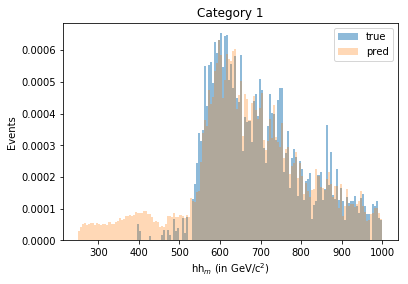

Total number of event in pred hist:  0.0308659
Total number of event in true hist:  0.0305053


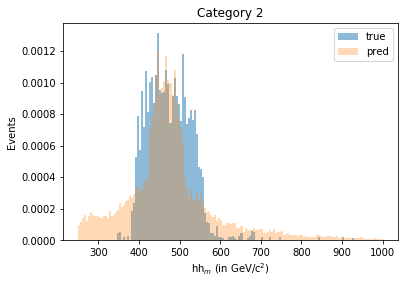

Total number of event in pred hist:  0.0100164
Total number of event in true hist:  0.00991993


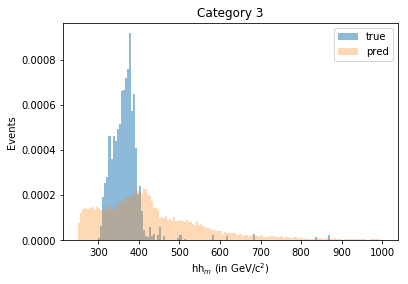

Total number of event in pred hist:  0.00275402
Total number of event in true hist:  0.00279649


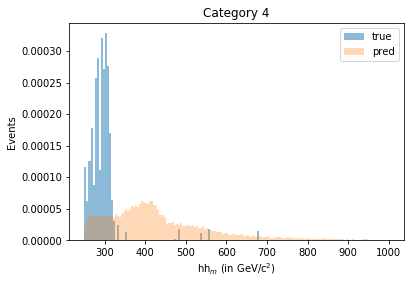

Total number of event in pred hist:  0.00613951
Total number of event in true hist:  0.00547663


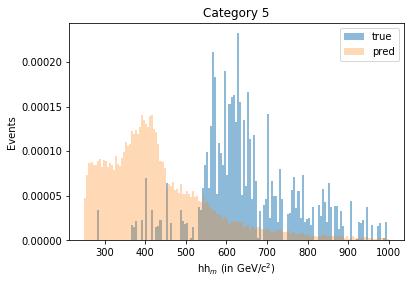

Total number of event in pred hist:  0.0106124
Total number of event in true hist:  0.0105573


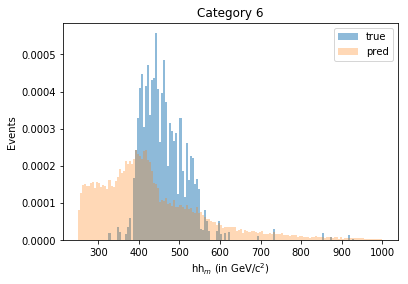

Total number of event in pred hist:  0.00812071
Total number of event in true hist:  0.00834505


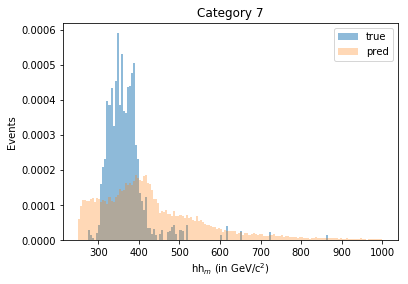

Total number of event in pred hist:  0.00383432
Total number of event in true hist:  0.00345584


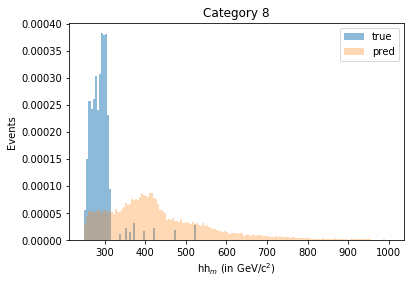

Total number of event in pred hist:  0.00547654
Total number of event in true hist:  0.00524741


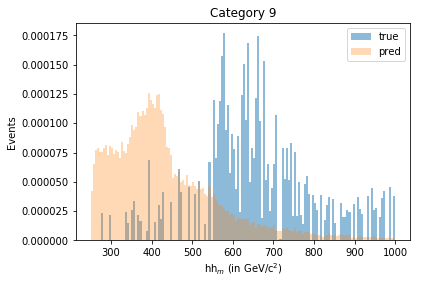

Total number of event in pred hist:  0.0133885
Total number of event in true hist:  0.0132073


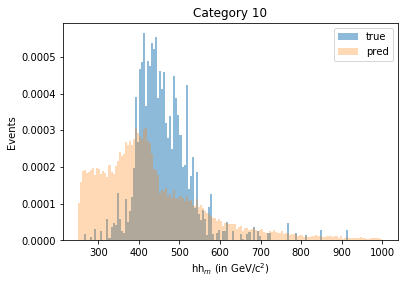

Total number of event in pred hist:  0.0111926
Total number of event in true hist:  0.0113621


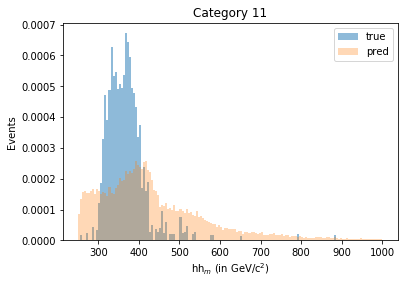

Total number of event in pred hist:  0.00516684
Total number of event in true hist:  0.00526823


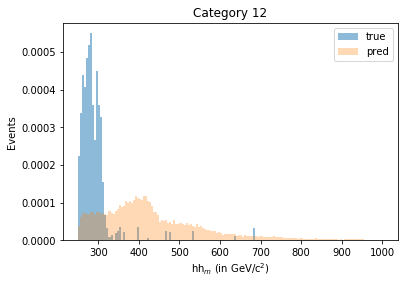

In [33]:
for i in range (0,13):
    cat_true=df[df.cat_true==i]
    plt.hist(cat_true['hh_m'],weights=cat_true.w_true,range=[250,1000],bins=150,alpha=0.5,label='true')
    plt.hist(df['hh_m'].ravel(),weights=y_pred_weight[i].ravel(),range=[250,1000],bins=150,alpha=0.3,label='pred')
    h_true=np.histogram(cat_true['hh_m'],weights=cat_true.w_true,range=[250,1000],bins=150)
    h_pred=np.histogram(df['hh_m'].ravel(),weights=y_pred_weight[i].ravel(),range=[250,1000],bins=150)
    print "Total number of event in pred hist: ",np.sum(h_pred[0])
    print "Total number of event in true hist: ",np.sum(h_true[0])
    plt.ylabel("Events")
    plt.xlabel("hh$_m$ (in GeV/c$^2$)")
    plt.title('Category %d'%i)
    plt.legend()
    plt.show()
    plt.close()

Total number of event in pred hist:  0.0596346
Total number of event in true hist:  0.0623994


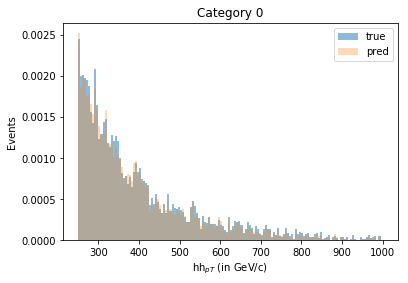

Total number of event in pred hist:  0.00665351
Total number of event in true hist:  0.00563872


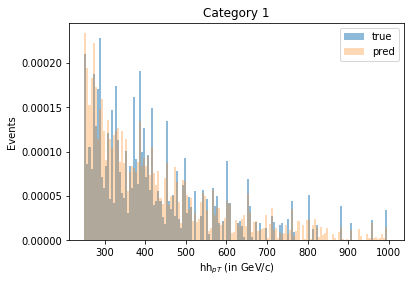

Total number of event in pred hist:  0.00620088
Total number of event in true hist:  0.00551656


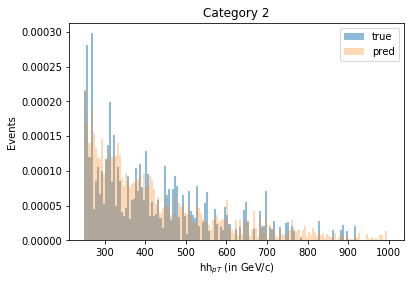

Total number of event in pred hist:  0.00150796
Total number of event in true hist:  0.00227974


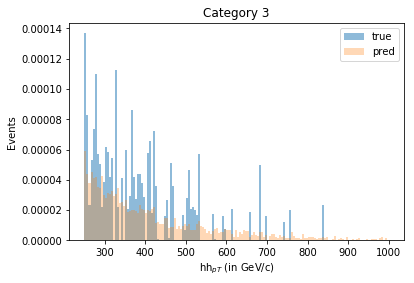

Total number of event in pred hist:  0.000414618
Total number of event in true hist:  0.000794324


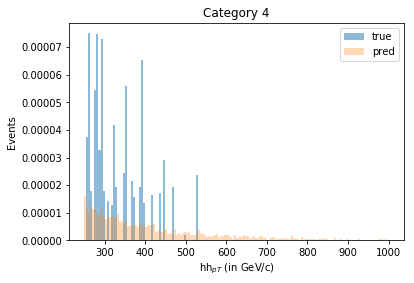

Total number of event in pred hist:  0.000924302
Total number of event in true hist:  0.00108731


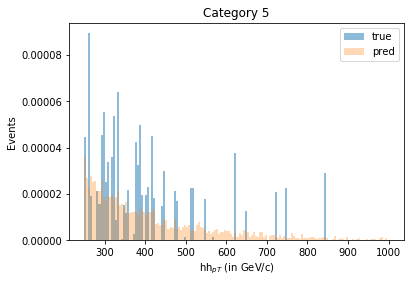

Total number of event in pred hist:  0.0015977
Total number of event in true hist:  0.00161167


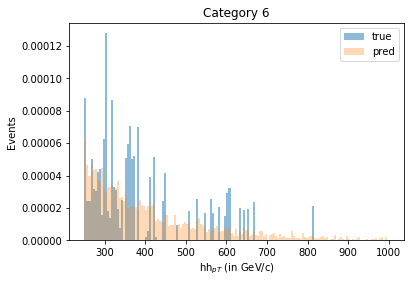

Total number of event in pred hist:  0.00122257
Total number of event in true hist:  0.000725646


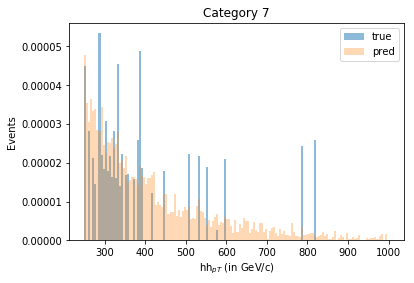

Total number of event in pred hist:  0.000577256
Total number of event in true hist:  0.00018932


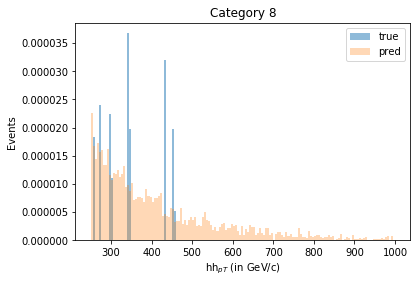

Total number of event in pred hist:  0.000824491
Total number of event in true hist:  0.0012442


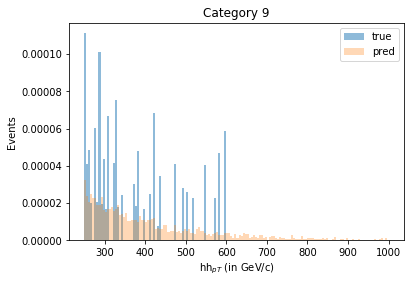

Total number of event in pred hist:  0.00201564
Total number of event in true hist:  0.00146114


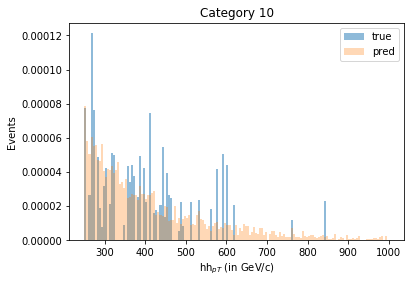

Total number of event in pred hist:  0.00168504
Total number of event in true hist:  0.000806887


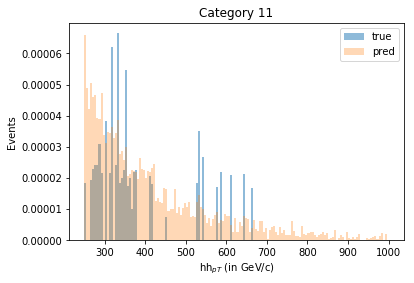

Total number of event in pred hist:  0.000777866
Total number of event in true hist:  0.000281494


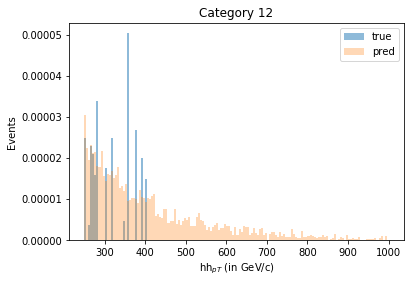

In [34]:
for i in range (0,13):
    cat_true=df[df.cat_true==i]
    plt.hist(cat_true['hh_pt'].ravel(),weights=cat_true.w_true.ravel(),range=[250,1000],bins=150,alpha=0.5,label='true')
    plt.hist(df['hh_pt'].ravel(),weights=y_pred_weight[i].ravel(),range=[250,1000],bins=150,alpha=0.3,label='pred')
    h_true=np.histogram(cat_true['hh_pt'],weights=cat_true.w_true,range=[250,1000],bins=150)
    h_pred=np.histogram(df['hh_pt'].ravel(),weights=y_pred_weight[i].ravel(),range=[250,1000],bins=150)
    print "Total number of event in pred hist: ",np.sum(h_pred[0])
    print "Total number of event in true hist: ",np.sum(h_true[0])
    plt.ylabel("Events")
    plt.xlabel("hh$_{pT}$ (in GeV/c)")
    plt.title('Category %d'%i)
    plt.legend()
    plt.show()
    plt.close()

Total number of event in pred hist:  0.59024
Total number of event in true hist:  0.594638


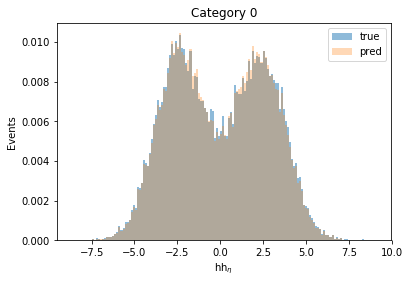

Total number of event in pred hist:  0.0339925
Total number of event in true hist:  0.0318687


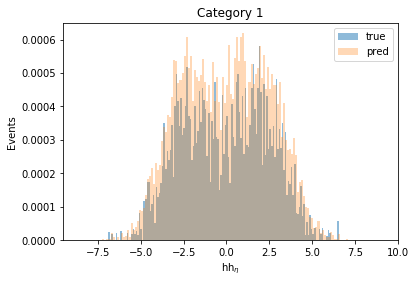

Total number of event in pred hist:  0.0314559
Total number of event in true hist:  0.0305053


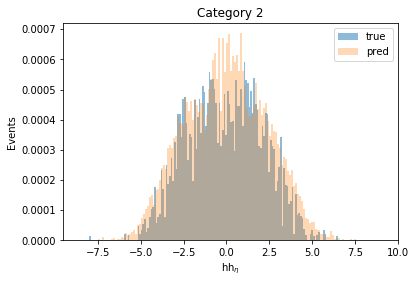

Total number of event in pred hist:  0.0102004
Total number of event in true hist:  0.00991993


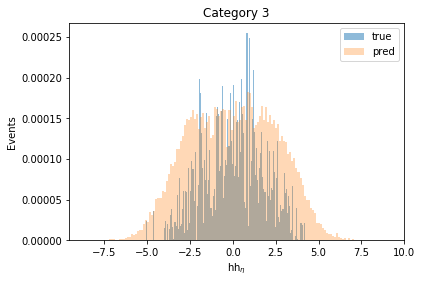

Total number of event in pred hist:  0.00280462
Total number of event in true hist:  0.00279649


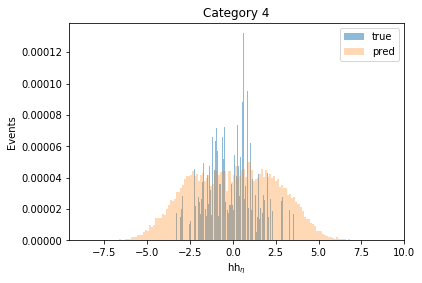

Total number of event in pred hist:  0.0062523
Total number of event in true hist:  0.00593223


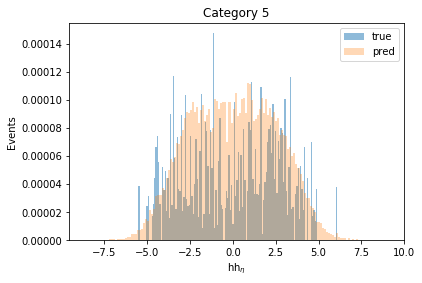

Total number of event in pred hist:  0.0108074
Total number of event in true hist:  0.0105573


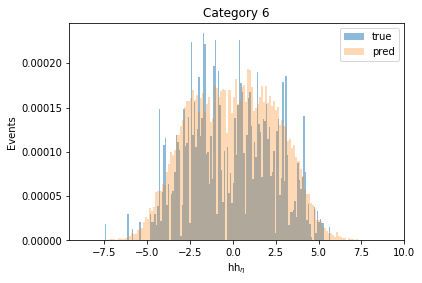

Total number of event in pred hist:  0.0082699
Total number of event in true hist:  0.00834505


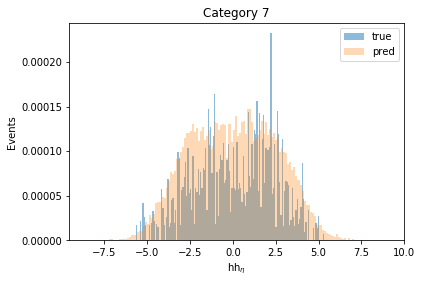

Total number of event in pred hist:  0.00390476
Total number of event in true hist:  0.00345584


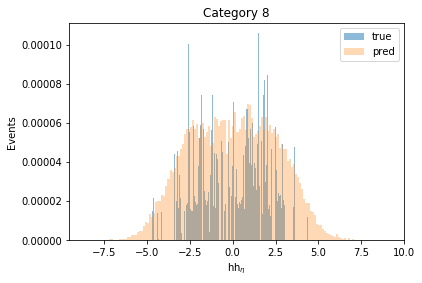

Total number of event in pred hist:  0.00557714
Total number of event in true hist:  0.00592141


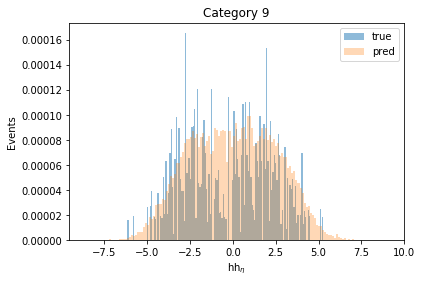

Total number of event in pred hist:  0.0136345
Total number of event in true hist:  0.0132289


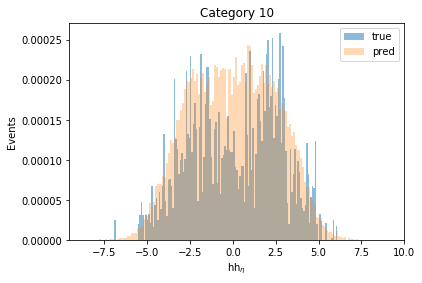

Total number of event in pred hist:  0.0113982
Total number of event in true hist:  0.0113621


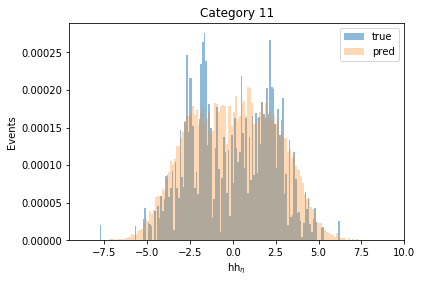

Total number of event in pred hist:  0.00526176
Total number of event in true hist:  0.00526823


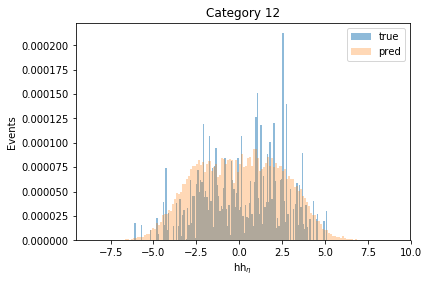

In [35]:
for i in range (0,13):
    cat_true=df[df.cat_true==i]
    plt.hist(cat_true['hh_eta'].ravel(),weights=cat_true.w_true.ravel(),bins=150,alpha=0.5,label='true')
    plt.hist(df['hh_eta'].ravel(),weights=y_pred_weight[i].ravel(),bins=150,alpha=0.3,label='pred')
    h_true=np.histogram(cat_true['hh_eta'],weights=cat_true.w_true,bins=150)
    h_pred=np.histogram(df['hh_eta'].ravel(),weights=y_pred_weight[i].ravel(),bins=150)
    print "Total number of event in pred hist: ",np.sum(h_pred[0])
    print "Total number of event in true hist: ",np.sum(h_true[0])
    plt.ylabel("Events")
    plt.xlabel("hh$_{\eta}$")
    plt.title('Category %d'%i)
    plt.legend()
    plt.show()
    plt.close()

Total number of event in pred hist:  0.59024
Total number of event in true hist:  0.594638


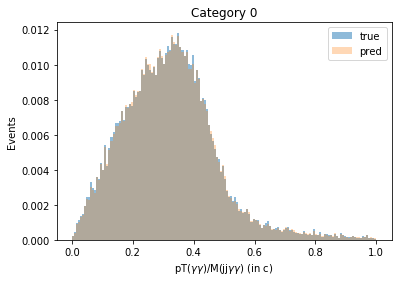

Total number of event in pred hist:  0.0339925
Total number of event in true hist:  0.0318687


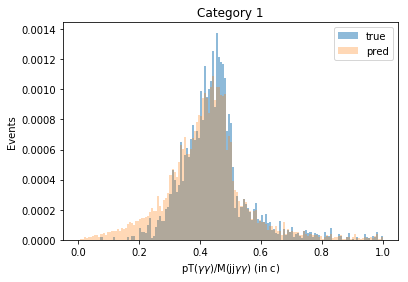

Total number of event in pred hist:  0.0314559
Total number of event in true hist:  0.0305053


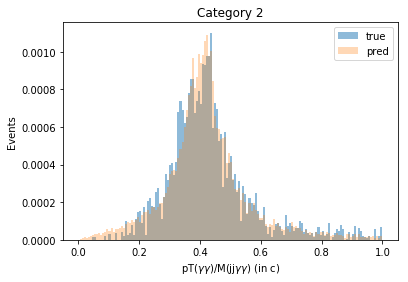

Total number of event in pred hist:  0.0102004
Total number of event in true hist:  0.00991993


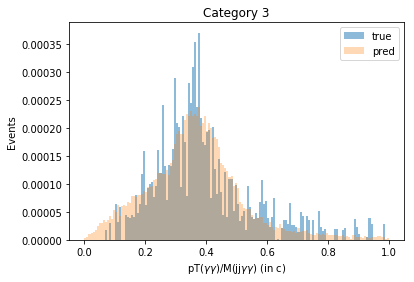

Total number of event in pred hist:  0.00280462
Total number of event in true hist:  0.00279649


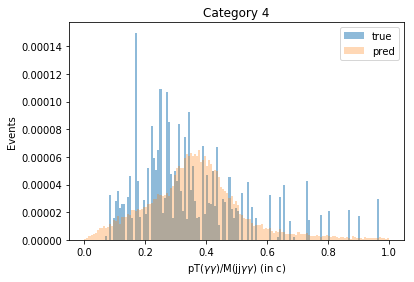

Total number of event in pred hist:  0.0062523
Total number of event in true hist:  0.00593223


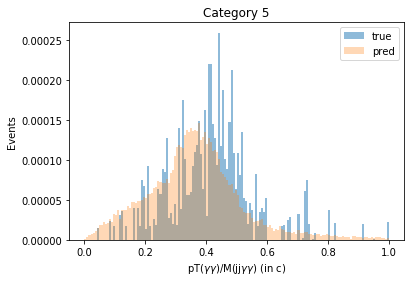

Total number of event in pred hist:  0.0108074
Total number of event in true hist:  0.0105573


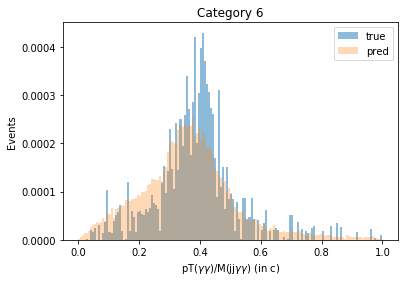

Total number of event in pred hist:  0.0082699
Total number of event in true hist:  0.00834505


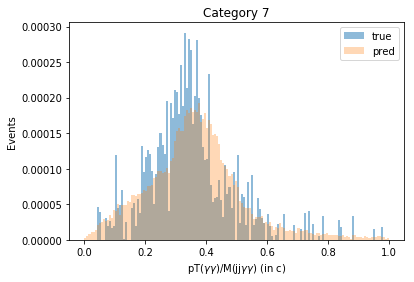

Total number of event in pred hist:  0.00390476
Total number of event in true hist:  0.00345584


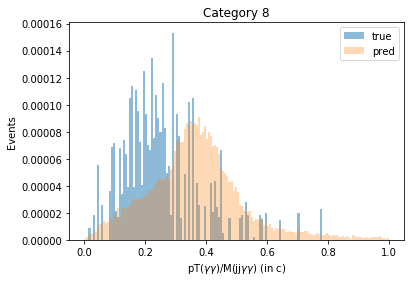

Total number of event in pred hist:  0.00557714
Total number of event in true hist:  0.00592141


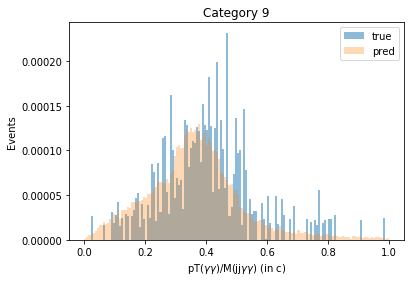

Total number of event in pred hist:  0.0136345
Total number of event in true hist:  0.0132289


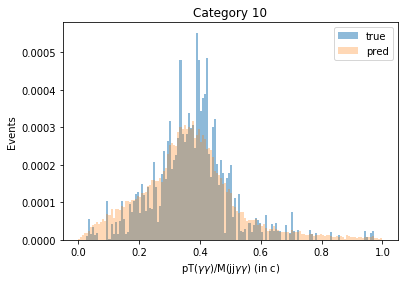

Total number of event in pred hist:  0.0113982
Total number of event in true hist:  0.0113621


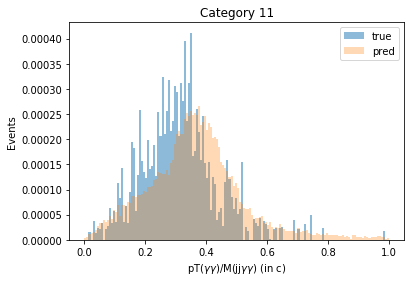

Total number of event in pred hist:  0.00526176
Total number of event in true hist:  0.00526823


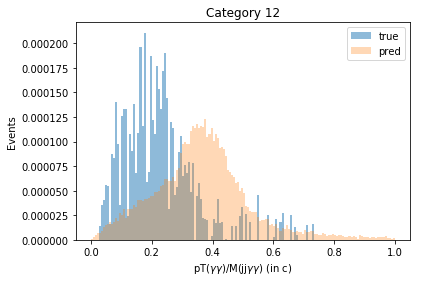

In [36]:
for i in range (0,13):
    cat_true=df[df.cat_true==i]
    plt.hist(cat_true['hgg_pt_hh_m'].ravel(),range=[0,1],weights=cat_true.w_true.ravel(),bins=150,alpha=0.5,label='true')
    plt.hist(df['hgg_pt_hh_m'].ravel(),range=[0,1],weights=y_pred_weight[i].ravel(),bins=150,alpha=0.3,label='pred')
    h_true=np.histogram(cat_true['hgg_pt_hh_m'],weights=cat_true.w_true,bins=150)
    h_pred=np.histogram(df['hgg_pt_hh_m'].ravel(),weights=y_pred_weight[i].ravel(),bins=150)
    print "Total number of event in pred hist: ",np.sum(h_pred[0])
    print "Total number of event in true hist: ",np.sum(h_true[0])
    plt.ylabel("Events")
    plt.xlabel("pT($\gamma\gamma$)/M(jj$\gamma\gamma$) (in c)")
    plt.title('Category %d'%i)
    plt.legend()
    plt.show()
    plt.close()

Total number of event in pred hist:  0.59024
Total number of event in true hist:  0.594638


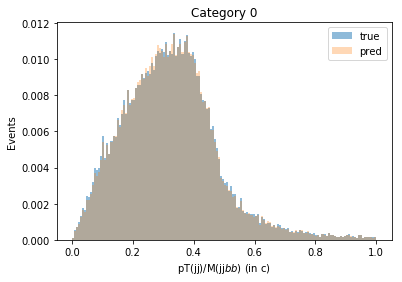

Total number of event in pred hist:  0.0339925
Total number of event in true hist:  0.0318687


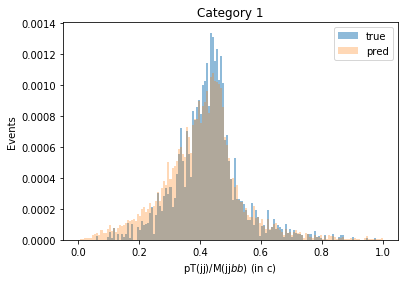

Total number of event in pred hist:  0.0314559
Total number of event in true hist:  0.0305053


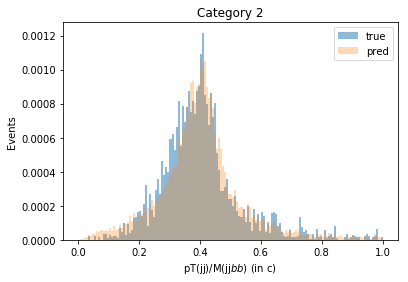

Total number of event in pred hist:  0.0102004
Total number of event in true hist:  0.00991993


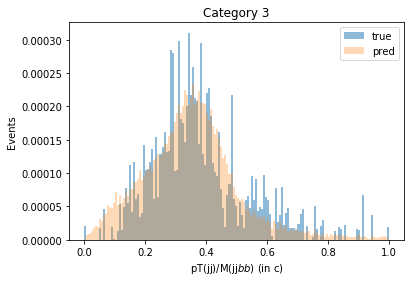

Total number of event in pred hist:  0.00280462
Total number of event in true hist:  0.00279649


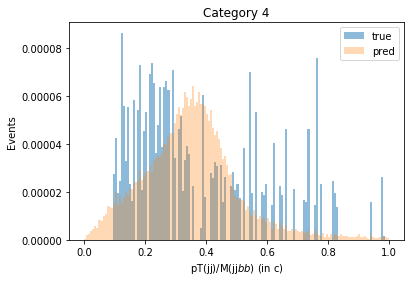

Total number of event in pred hist:  0.0062523
Total number of event in true hist:  0.00593223


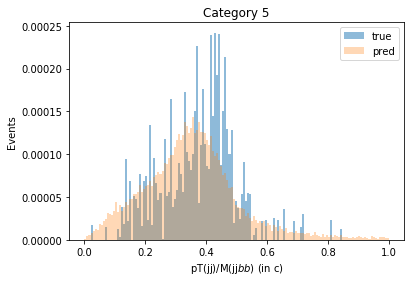

Total number of event in pred hist:  0.0108074
Total number of event in true hist:  0.0105573


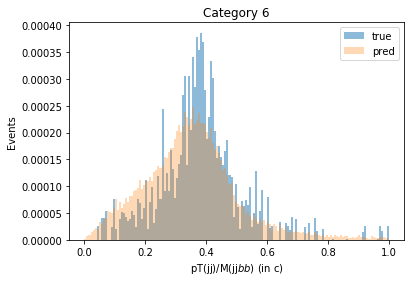

Total number of event in pred hist:  0.00826989
Total number of event in true hist:  0.00834505


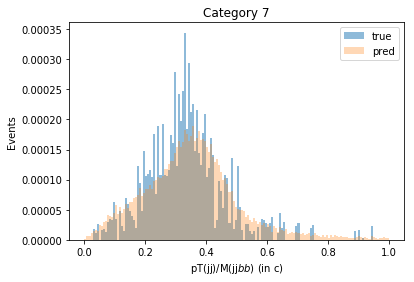

Total number of event in pred hist:  0.00390476
Total number of event in true hist:  0.00345584


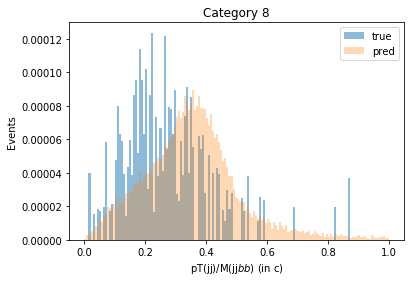

Total number of event in pred hist:  0.00557714
Total number of event in true hist:  0.00592141


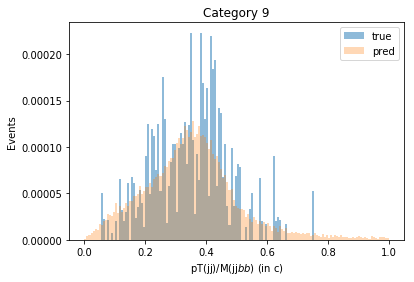

Total number of event in pred hist:  0.0136345
Total number of event in true hist:  0.0132289


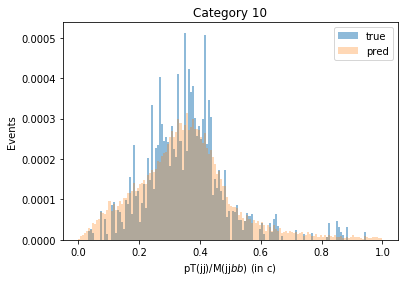

Total number of event in pred hist:  0.0113982
Total number of event in true hist:  0.0113621


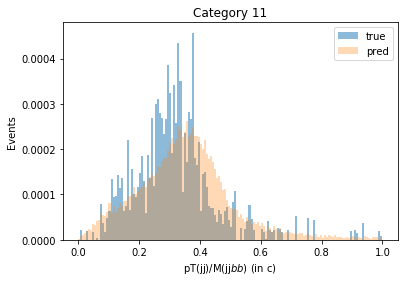

Total number of event in pred hist:  0.00526176
Total number of event in true hist:  0.00526823


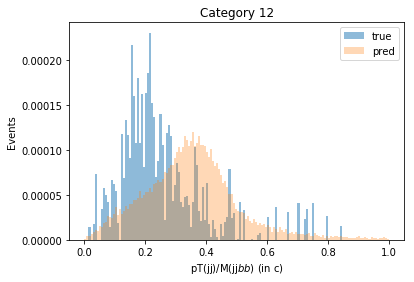

In [37]:
for i in range (0,13):
    cat_true=df[df.cat_true==i]
    plt.hist(cat_true['hbb_pt_hh_m'].ravel(),range=[0,1],weights=cat_true.w_true.ravel(),bins=150,alpha=0.5,label='true')
    plt.hist(df['hbb_pt_hh_m'].ravel(),range=[0,1],weights=y_pred_weight[i].ravel(),bins=150,alpha=0.3,label='pred')
    h_true=np.histogram(cat_true['hbb_pt_hh_m'],weights=cat_true.w_true,bins=150)
    h_pred=np.histogram(df['hbb_pt_hh_m'].ravel(),weights=y_pred_weight[i].ravel(),bins=150)
    print "Total number of event in pred hist: ",np.sum(h_pred[0])
    print "Total number of event in true hist: ",np.sum(h_true[0])
    plt.ylabel("Events")
    plt.xlabel("pT(jj)/M(jj$bb$) (in c)")
    plt.title('Category %d'%i)
    plt.legend()
    plt.show()
    plt.close()

Total number of event in pred hist:  0.59024
Total number of event in true hist:  0.594638


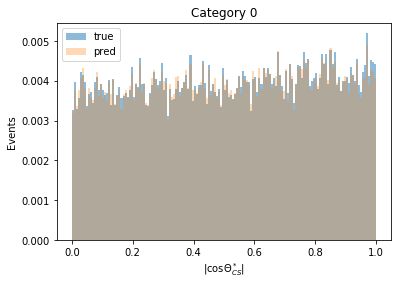

Total number of event in pred hist:  0.0339925
Total number of event in true hist:  0.0318687


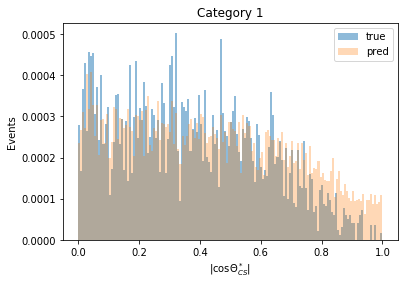

Total number of event in pred hist:  0.0314559
Total number of event in true hist:  0.0305053


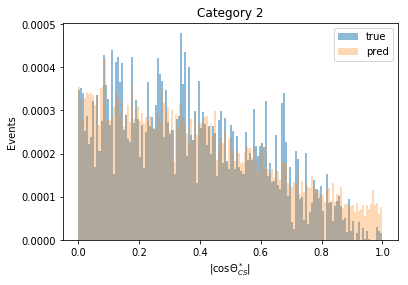

Total number of event in pred hist:  0.0102004
Total number of event in true hist:  0.00991993


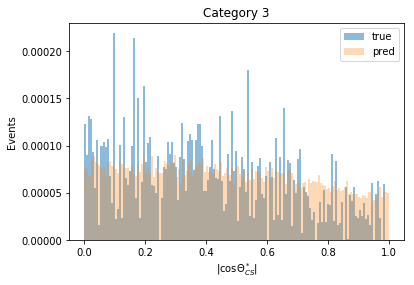

Total number of event in pred hist:  0.00280462
Total number of event in true hist:  0.00279649


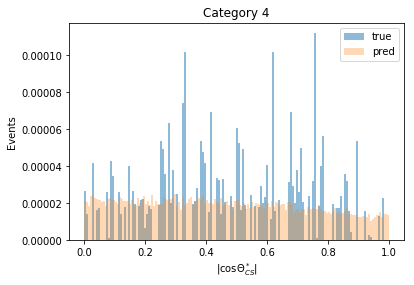

Total number of event in pred hist:  0.0062523
Total number of event in true hist:  0.00593223


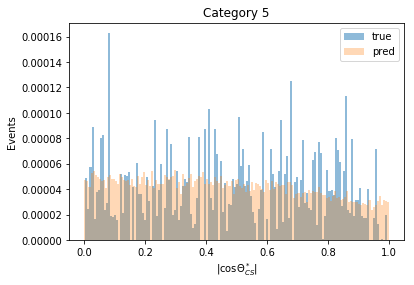

Total number of event in pred hist:  0.0108074
Total number of event in true hist:  0.0105573


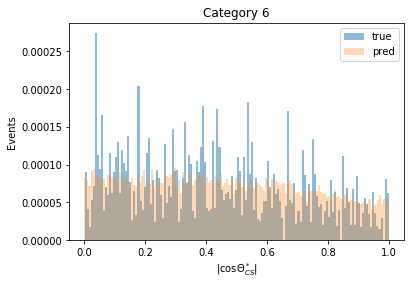

Total number of event in pred hist:  0.0082699
Total number of event in true hist:  0.00834505


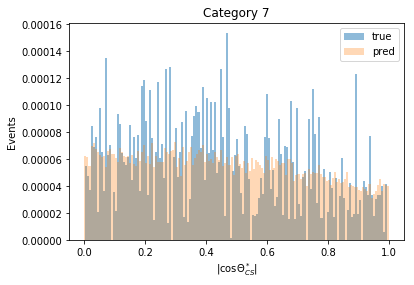

Total number of event in pred hist:  0.00390476
Total number of event in true hist:  0.00345584


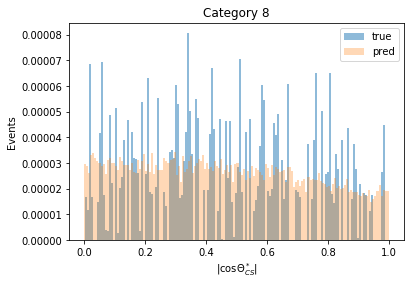

Total number of event in pred hist:  0.00557714
Total number of event in true hist:  0.00592141


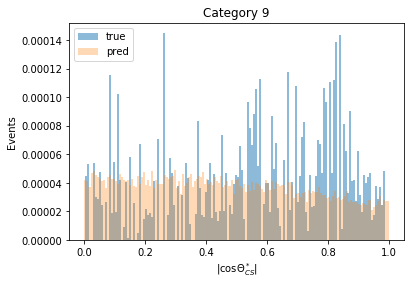

Total number of event in pred hist:  0.0136345
Total number of event in true hist:  0.0132289


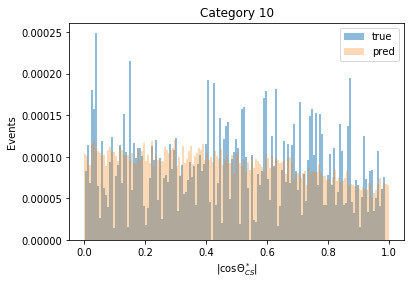

Total number of event in pred hist:  0.0113982
Total number of event in true hist:  0.0113621


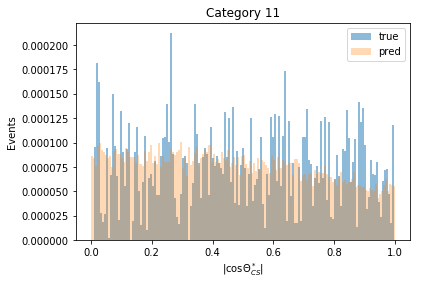

Total number of event in pred hist:  0.00526176
Total number of event in true hist:  0.00526823


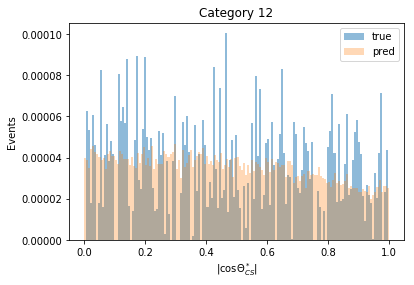

In [38]:
for i in range (0,13):
    cat_true=df[df.cat_true==i]
    plt.hist(np.abs(cat_true['cos_theta_cs'].ravel()),weights=cat_true.w_true.ravel(),bins=150,alpha=0.5,label='true')
    plt.hist(np.abs(df['cos_theta_cs'].ravel()),weights=y_pred_weight[i].ravel(),bins=150,alpha=0.3,label='pred')
    h_true=np.histogram(np.abs(cat_true['cos_theta_cs'].ravel()),weights=cat_true.w_true,bins=150)
    h_pred=np.histogram(np.abs(df['cos_theta_cs'].ravel()),weights=y_pred_weight[i].ravel(),bins=150)
    print "Total number of event in pred hist: ",np.sum(h_pred[0])
    print "Total number of event in true hist: ",np.sum(h_true[0])
    plt.ylabel("Events")
    plt.xlabel("|cos$\Theta_{CS}^*$|")
    plt.title('Category %d'%i)
    plt.legend()
    plt.show()
    plt.close()

Total number of event in pred hist:  0.59024
Total number of event in true hist:  0.594638


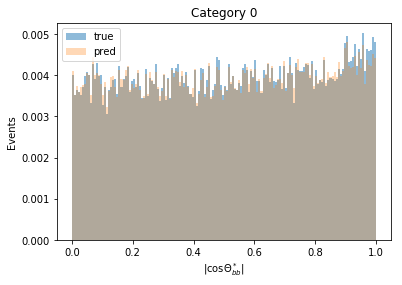

Total number of event in pred hist:  0.0339925
Total number of event in true hist:  0.0318687


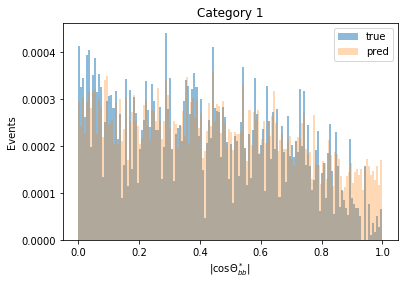

Total number of event in pred hist:  0.0314559
Total number of event in true hist:  0.0305053


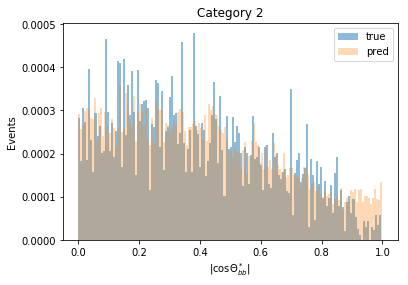

Total number of event in pred hist:  0.0102004
Total number of event in true hist:  0.00991993


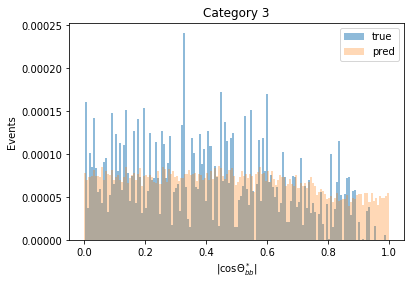

Total number of event in pred hist:  0.00280462
Total number of event in true hist:  0.00279649


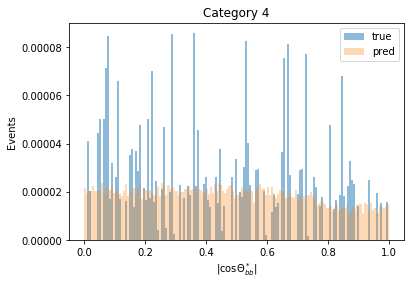

Total number of event in pred hist:  0.0062523
Total number of event in true hist:  0.00593223


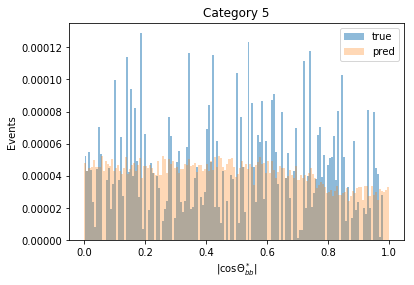

Total number of event in pred hist:  0.0108074
Total number of event in true hist:  0.0105573


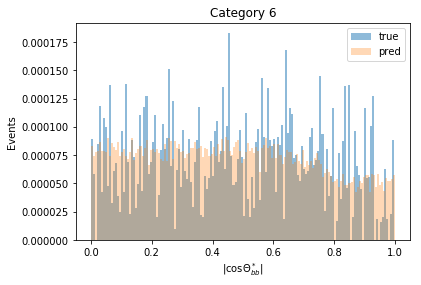

Total number of event in pred hist:  0.0082699
Total number of event in true hist:  0.00834505


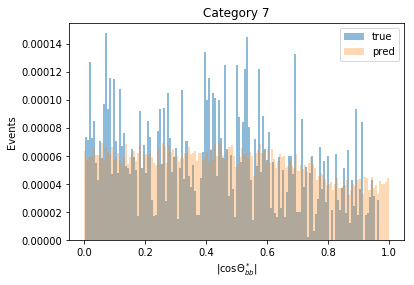

Total number of event in pred hist:  0.00390476
Total number of event in true hist:  0.00345584


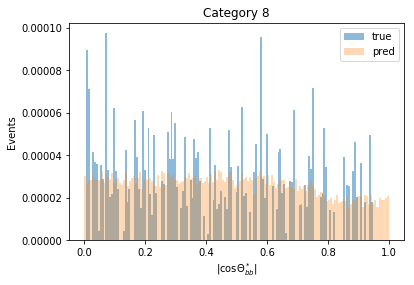

Total number of event in pred hist:  0.00557714
Total number of event in true hist:  0.00592141


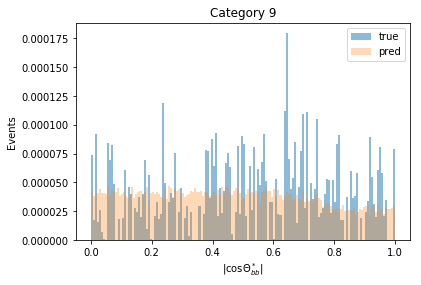

Total number of event in pred hist:  0.0136345
Total number of event in true hist:  0.0132289


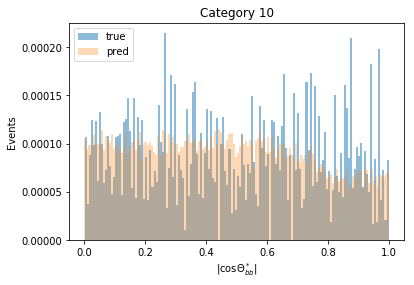

Total number of event in pred hist:  0.0113982
Total number of event in true hist:  0.0113621


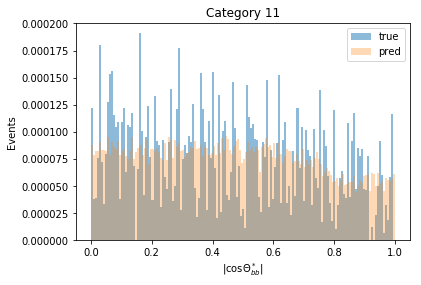

Total number of event in pred hist:  0.00526176
Total number of event in true hist:  0.00526823


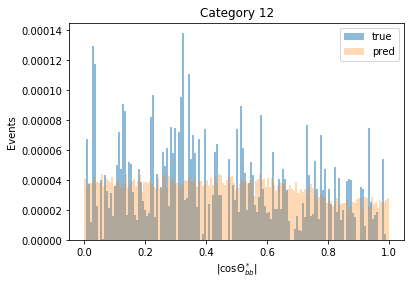

In [39]:
for i in range (0,13):
    cat_true=df[df.cat_true==i]
    plt.hist(np.abs(cat_true['cos_theta_hbb'].ravel()),weights=cat_true.w_true.ravel(),bins=150,alpha=0.5,label='true')
    plt.hist(np.abs(df['cos_theta_hbb'].ravel()),weights=y_pred_weight[i].ravel(),bins=150,alpha=0.3,label='pred')
    h_true=np.histogram(np.abs(cat_true['cos_theta_hbb'].ravel()),weights=cat_true.w_true,bins=150)
    h_pred=np.histogram(np.abs(df['cos_theta_hbb'].ravel()),weights=y_pred_weight[i].ravel(),bins=150)
    print "Total number of event in pred hist: ",np.sum(h_pred[0])
    print "Total number of event in true hist: ",np.sum(h_true[0])
    plt.ylabel("Events")
    plt.xlabel("|cos$\Theta_{bb}^*$|")
    plt.title('Category %d'%i)
    plt.legend()
    plt.show()
    plt.close()

Total number of event in pred hist:  0.59024
Total number of event in true hist:  0.594638


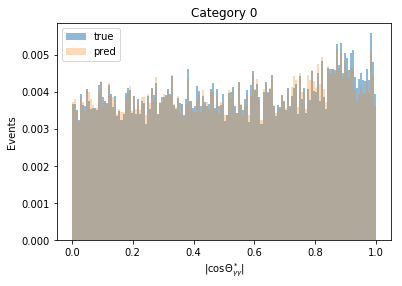

Total number of event in pred hist:  0.0339925
Total number of event in true hist:  0.0318687


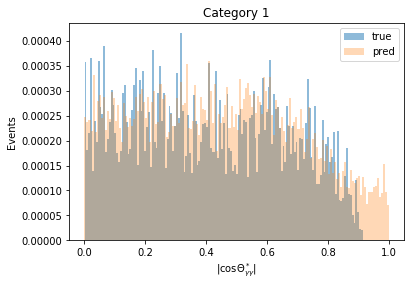

Total number of event in pred hist:  0.0314559
Total number of event in true hist:  0.0305053


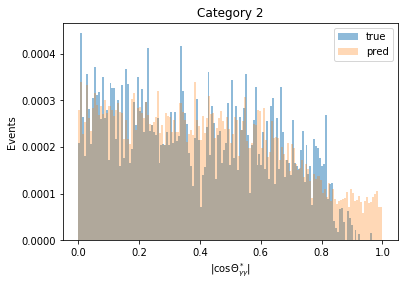

Total number of event in pred hist:  0.0102004
Total number of event in true hist:  0.00991993


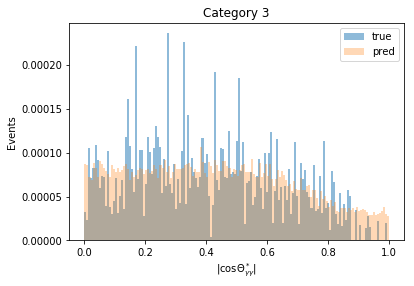

Total number of event in pred hist:  0.00280462
Total number of event in true hist:  0.00279649


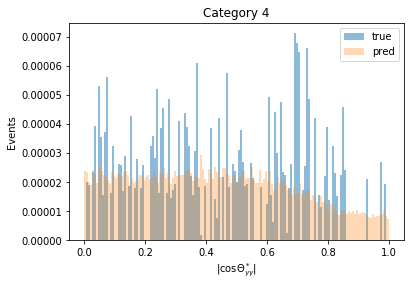

Total number of event in pred hist:  0.0062523
Total number of event in true hist:  0.00593223


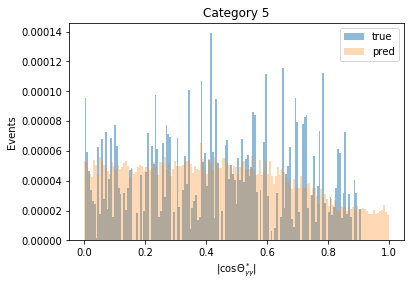

Total number of event in pred hist:  0.0108074
Total number of event in true hist:  0.0105573


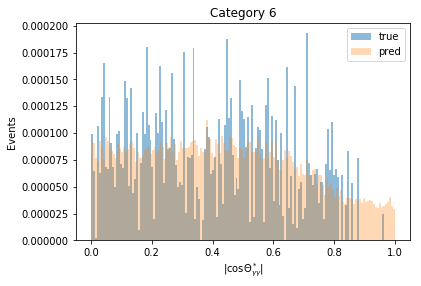

Total number of event in pred hist:  0.00826989
Total number of event in true hist:  0.00834505


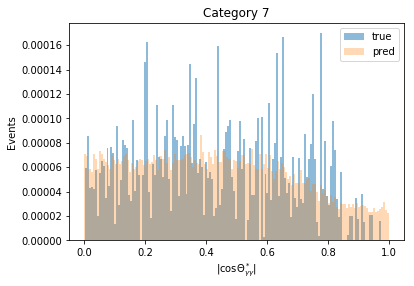

Total number of event in pred hist:  0.00390476
Total number of event in true hist:  0.00345584


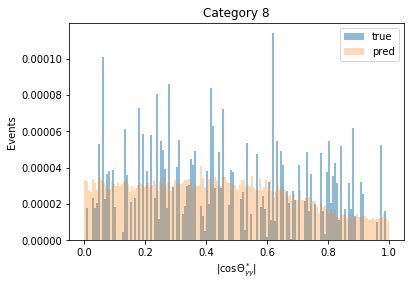

Total number of event in pred hist:  0.00557714
Total number of event in true hist:  0.00592141


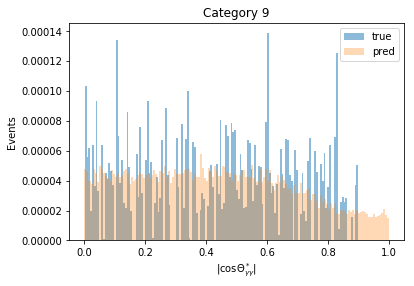

Total number of event in pred hist:  0.0136345
Total number of event in true hist:  0.0132289


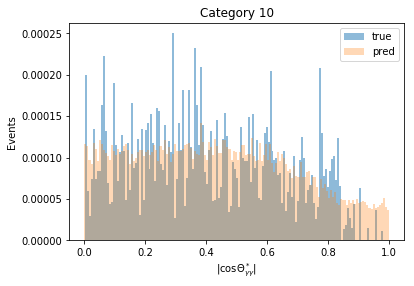

Total number of event in pred hist:  0.0113982
Total number of event in true hist:  0.0113621


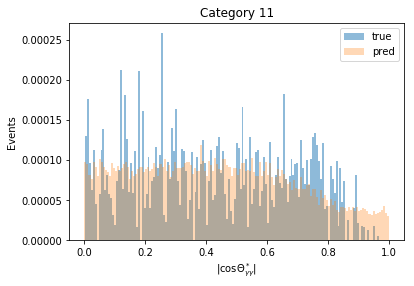

Total number of event in pred hist:  0.00526176
Total number of event in true hist:  0.00526823


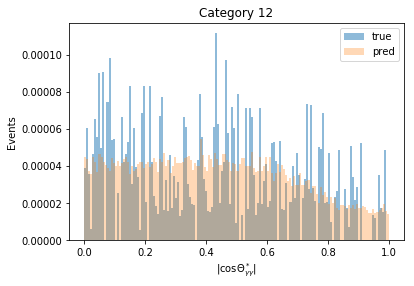

In [40]:
for i in range (0,13):
    cat_true=df[df.cat_true==i]
    plt.hist(np.abs(cat_true['cos_theta_hgg'].ravel()),weights=cat_true.w_true.ravel(),bins=150,alpha=0.5,label='true')
    plt.hist(np.abs(df['cos_theta_hgg'].ravel()),weights=y_pred_weight[i].ravel(),bins=150,alpha=0.3,label='pred')
    h_true=np.histogram(np.abs(cat_true['cos_theta_hgg'].ravel()),weights=cat_true.w_true,bins=150)
    h_pred=np.histogram(np.abs(df['cos_theta_hgg'].ravel()),weights=y_pred_weight[i].ravel(),bins=150)
    print "Total number of event in pred hist: ",np.sum(h_pred[0])
    print "Total number of event in true hist: ",np.sum(h_true[0])
    plt.ylabel("Events")
    plt.xlabel("|cos$\Theta_{\gamma\gamma}^*$|")
    plt.title('Category %d'%i)
    plt.legend()
    plt.show()
    plt.close()

Total number of event in pred hist:  0.59024
Total number of event in true hist:  0.594638


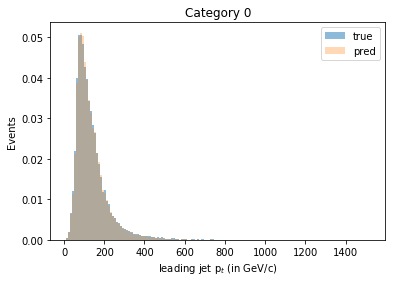

Total number of event in pred hist:  0.0339925
Total number of event in true hist:  0.0318687


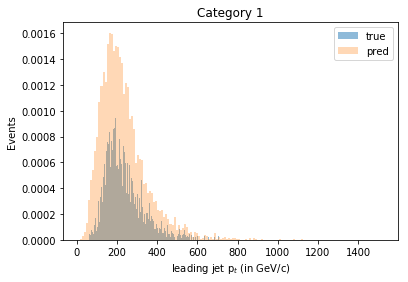

Total number of event in pred hist:  0.0314559
Total number of event in true hist:  0.0305053


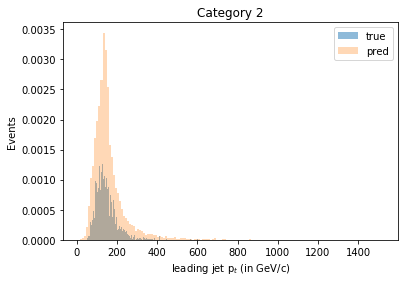

Total number of event in pred hist:  0.0102004
Total number of event in true hist:  0.00991993


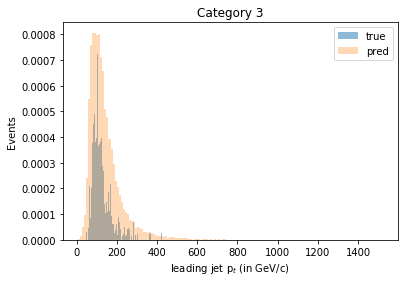

Total number of event in pred hist:  0.00280462
Total number of event in true hist:  0.00279649


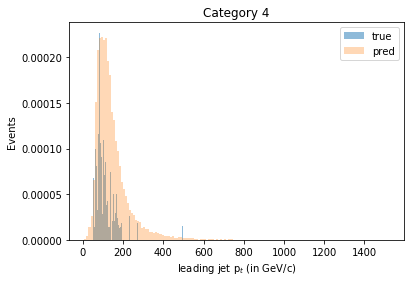

Total number of event in pred hist:  0.0062523
Total number of event in true hist:  0.00593223


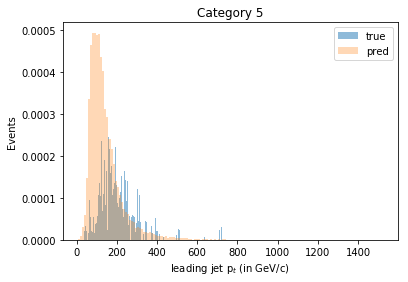

Total number of event in pred hist:  0.0108074
Total number of event in true hist:  0.0105573


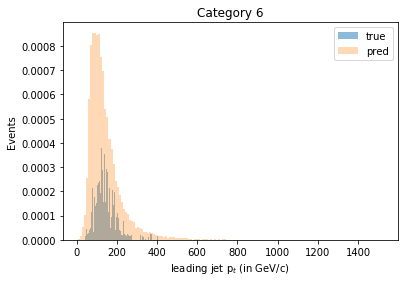

Total number of event in pred hist:  0.0082699
Total number of event in true hist:  0.00834505


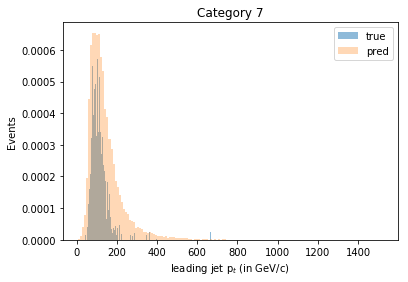

Total number of event in pred hist:  0.00390476
Total number of event in true hist:  0.00345584


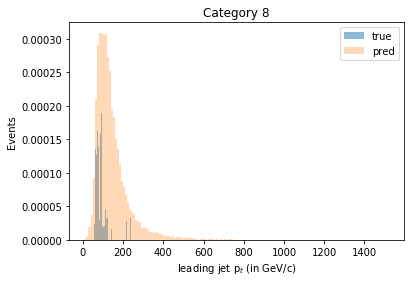

Total number of event in pred hist:  0.00557714
Total number of event in true hist:  0.00592141


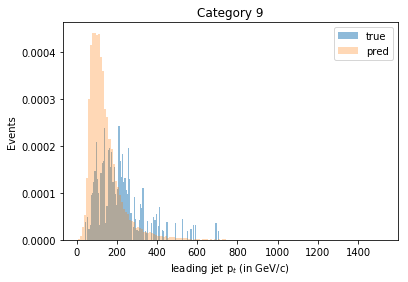

Total number of event in pred hist:  0.0136345
Total number of event in true hist:  0.0132289


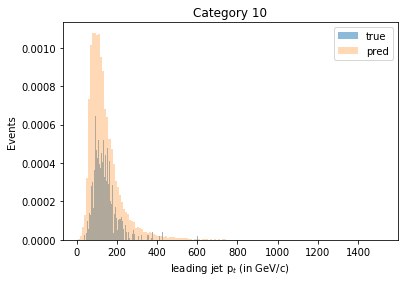

Total number of event in pred hist:  0.0113982
Total number of event in true hist:  0.0113621


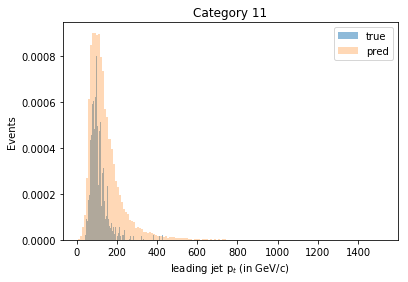

Total number of event in pred hist:  0.00526176
Total number of event in true hist:  0.00526823


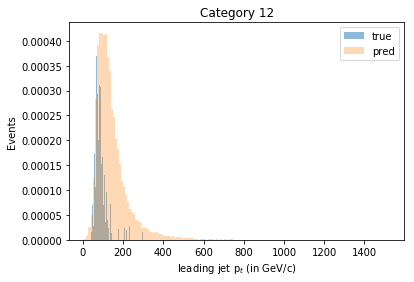

In [41]:
for i in range (0,13):
    cat_true=df[df.cat_true==i]
    plt.hist(cat_true['leadJet_pt'].ravel(),weights=cat_true.w_true.ravel(),bins=150,alpha=0.5,label='true')
    plt.hist(df['leadJet_pt'].ravel(),weights=y_pred_weight[i].ravel(),bins=150,alpha=0.3,label='pred')
    h_true=np.histogram(cat_true['leadJet_pt'].ravel(),weights=cat_true.w_true,bins=150)
    h_pred=np.histogram(df['leadJet_pt'].ravel(),weights=y_pred_weight[i].ravel(),bins=150)
    print "Total number of event in pred hist: ",np.sum(h_pred[0])
    print "Total number of event in true hist: ",np.sum(h_true[0])
    plt.ylabel("Events")
    plt.xlabel("leading jet p$_t$ (in GeV/c)")
    plt.title('Category %d'%i)
    plt.legend()
    plt.show()
    plt.close()

Total number of event in pred hist:  0.59024
Total number of event in true hist:  0.594638


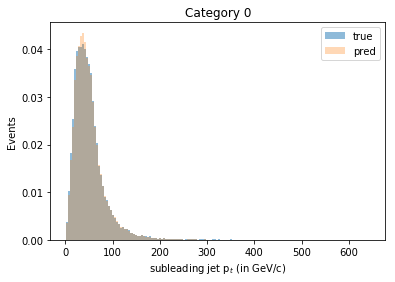

Total number of event in pred hist:  0.0339925
Total number of event in true hist:  0.0318687


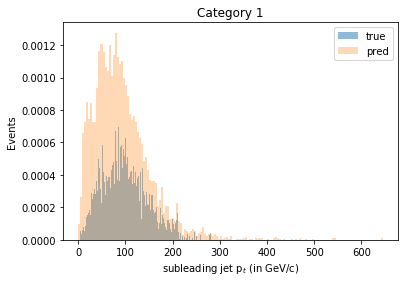

Total number of event in pred hist:  0.0314559
Total number of event in true hist:  0.0305053


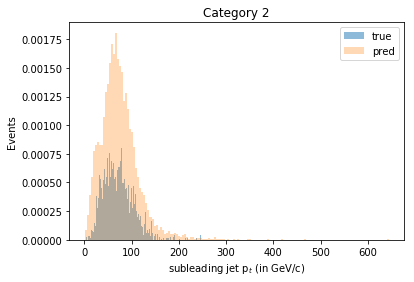

Total number of event in pred hist:  0.0102004
Total number of event in true hist:  0.00991993


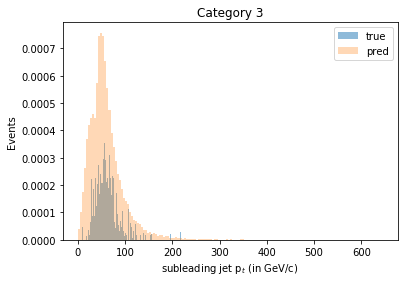

Total number of event in pred hist:  0.00280462
Total number of event in true hist:  0.00279649


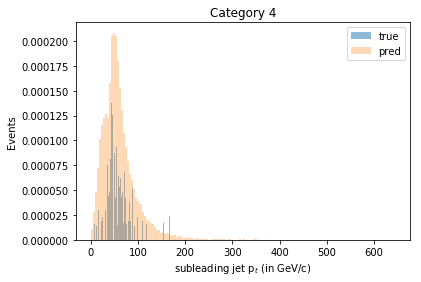

Total number of event in pred hist:  0.0062523
Total number of event in true hist:  0.00593223


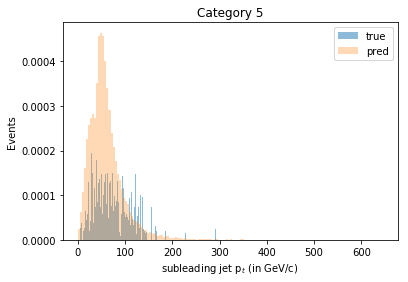

Total number of event in pred hist:  0.0108074
Total number of event in true hist:  0.0105573


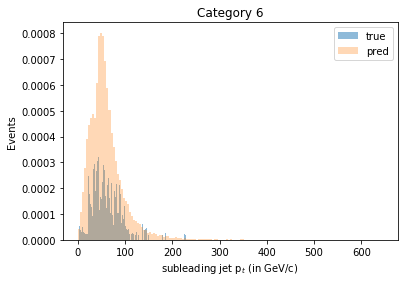

Total number of event in pred hist:  0.00826989
Total number of event in true hist:  0.00834505


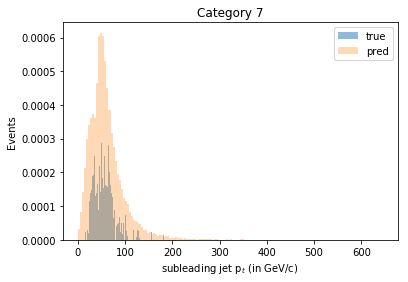

Total number of event in pred hist:  0.00390476
Total number of event in true hist:  0.00345584


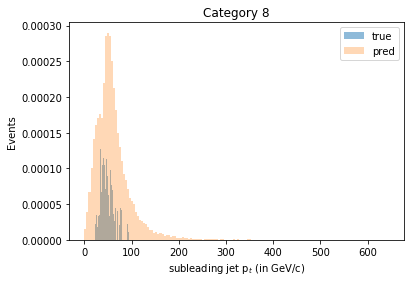

Total number of event in pred hist:  0.00557714
Total number of event in true hist:  0.00592141


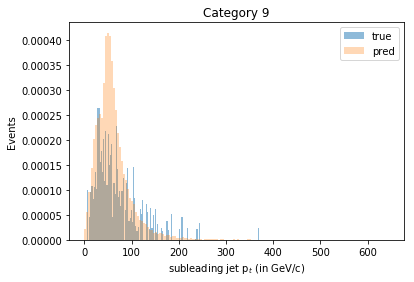

Total number of event in pred hist:  0.0136345
Total number of event in true hist:  0.0132289


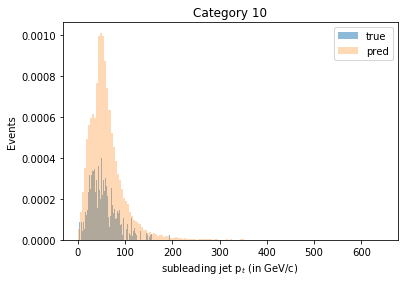

Total number of event in pred hist:  0.0113982
Total number of event in true hist:  0.0113621


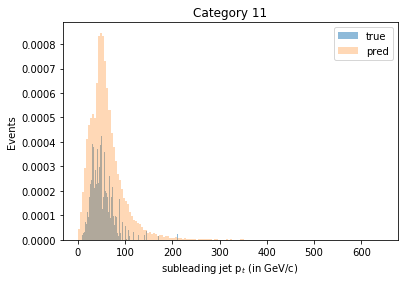

Total number of event in pred hist:  0.00526176
Total number of event in true hist:  0.00526823


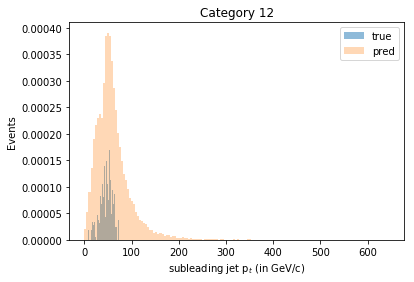

In [42]:
for i in range (0,13):
    cat_true=df[df.cat_true==i]
    plt.hist(cat_true['subleadJet_pt'].ravel(),weights=cat_true.w_true.ravel(),bins=150,alpha=0.5,label='true')
    plt.hist(df['subleadJet_pt'].ravel(),weights=y_pred_weight[i].ravel(),bins=150,alpha=0.3,label='pred')
    h_true=np.histogram(cat_true['subleadJet_pt'].ravel(),weights=cat_true.w_true,bins=150)
    h_pred=np.histogram(df['subleadJet_pt'].ravel(),weights=y_pred_weight[i].ravel(),bins=150)
    print "Total number of event in pred hist: ",np.sum(h_pred[0])
    print "Total number of event in true hist: ",np.sum(h_true[0])
    plt.ylabel("Events")
    plt.xlabel("subleading jet p$_t$ (in GeV/c)")
    plt.title('Category %d'%i)
    plt.legend()
    plt.show()
    plt.close()

Total number of event in pred hist:  0.59024
Total number of event in true hist:  0.594638


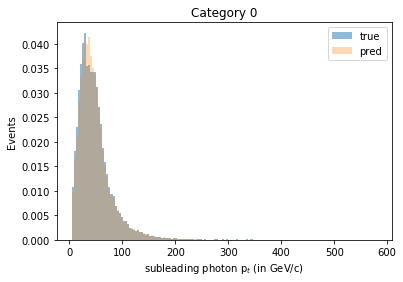

Total number of event in pred hist:  0.0339925
Total number of event in true hist:  0.0318687


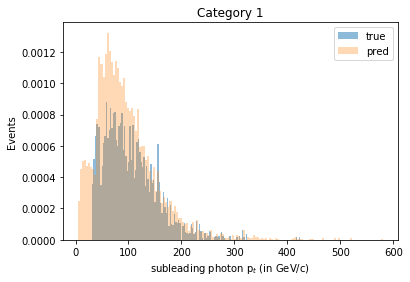

Total number of event in pred hist:  0.0314559
Total number of event in true hist:  0.0305053


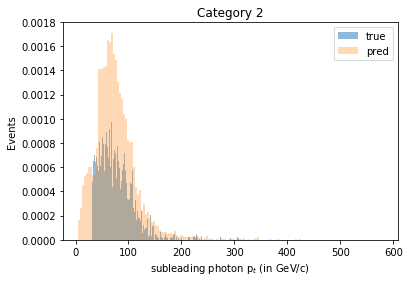

Total number of event in pred hist:  0.0102004
Total number of event in true hist:  0.00991993


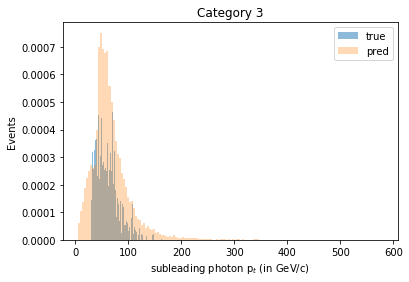

Total number of event in pred hist:  0.00280462
Total number of event in true hist:  0.00279649


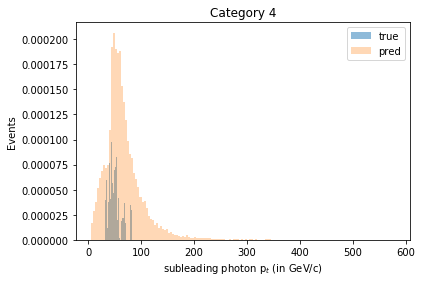

Total number of event in pred hist:  0.0062523
Total number of event in true hist:  0.00593223


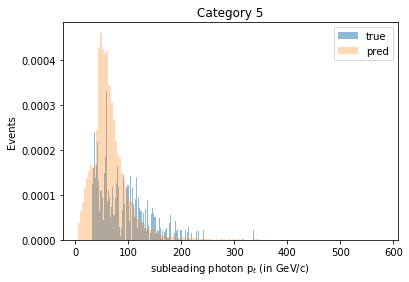

Total number of event in pred hist:  0.0108074
Total number of event in true hist:  0.0105573


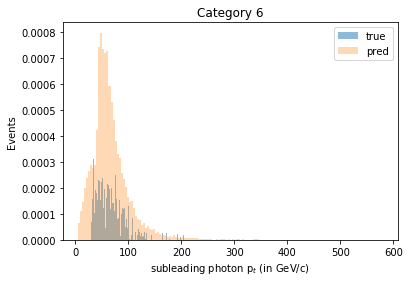

Total number of event in pred hist:  0.0082699
Total number of event in true hist:  0.00834505


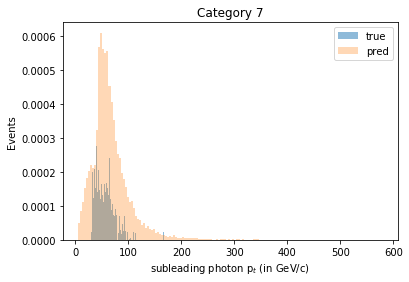

Total number of event in pred hist:  0.00390476
Total number of event in true hist:  0.00345584


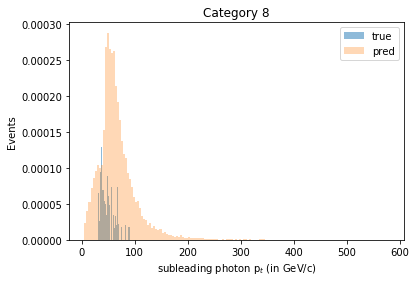

Total number of event in pred hist:  0.00557714
Total number of event in true hist:  0.00592141


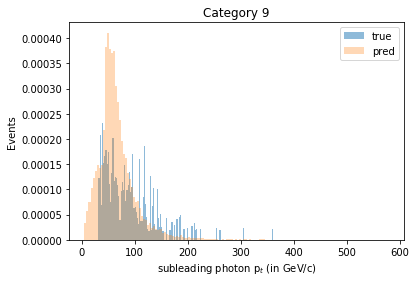

Total number of event in pred hist:  0.0136345
Total number of event in true hist:  0.0132289


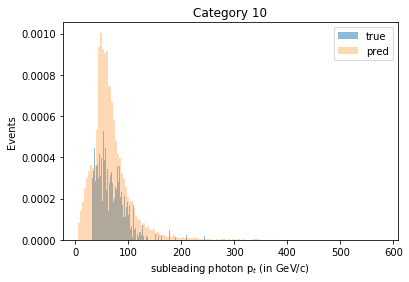

Total number of event in pred hist:  0.0113982
Total number of event in true hist:  0.0113621


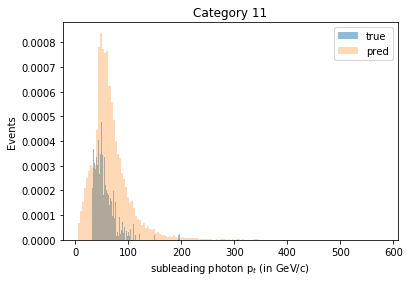

Total number of event in pred hist:  0.00526176
Total number of event in true hist:  0.00526823


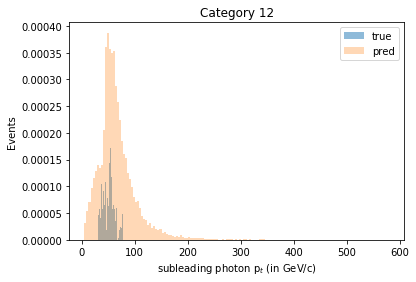

In [43]:
for i in range (0,13):
    cat_true=df[df.cat_true==i]
    plt.hist(cat_true['subleadPho_pt'].ravel(),weights=cat_true.w_true.ravel(),bins=150,alpha=0.5,label='true')
    plt.hist(df['subleadPho_pt'].ravel(),weights=y_pred_weight[i].ravel(),bins=150,alpha=0.3,label='pred')
    h_true=np.histogram(cat_true['subleadPho_pt'].ravel(),weights=cat_true.w_true,bins=150)
    h_pred=np.histogram(df['subleadPho_pt'].ravel(),weights=y_pred_weight[i].ravel(),bins=150)
    print "Total number of event in pred hist: ",np.sum(h_pred[0])
    print "Total number of event in true hist: ",np.sum(h_true[0])
    plt.ylabel("Events")
    plt.xlabel("subleading photon p$_t$ (in GeV/c)")
    plt.title('Category %d'%i)
    plt.legend()
    plt.show()
    plt.close()

Total number of event in pred hist:  0.59024
Total number of event in true hist:  0.594638


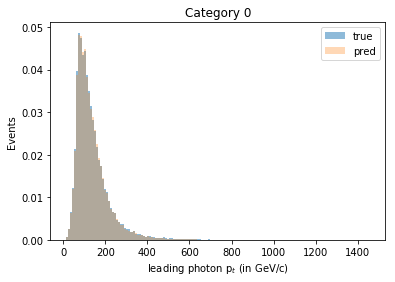

Total number of event in pred hist:  0.0339925
Total number of event in true hist:  0.0318687


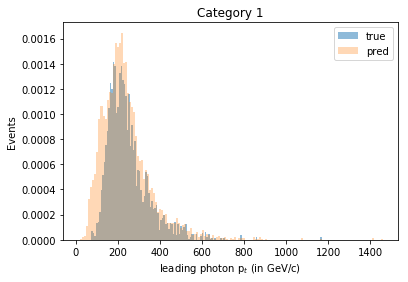

Total number of event in pred hist:  0.0314559
Total number of event in true hist:  0.0305053


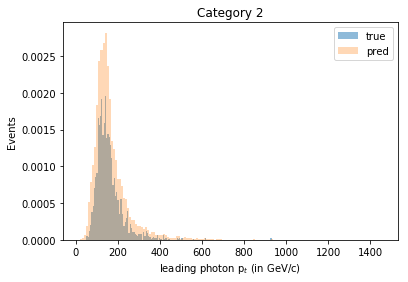

Total number of event in pred hist:  0.0102004
Total number of event in true hist:  0.00991993


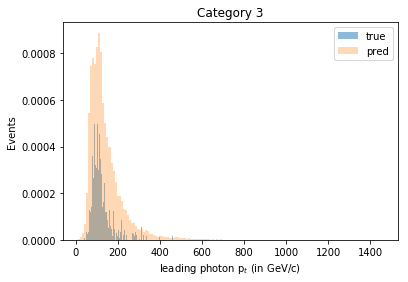

Total number of event in pred hist:  0.00280462
Total number of event in true hist:  0.00279649


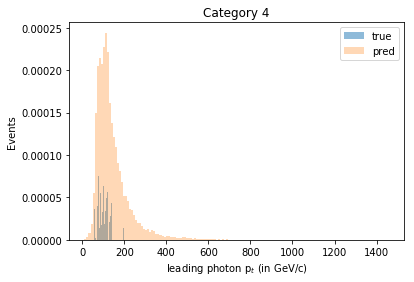

Total number of event in pred hist:  0.0062523
Total number of event in true hist:  0.00593223


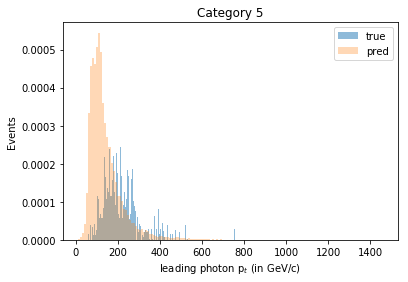

Total number of event in pred hist:  0.0108074
Total number of event in true hist:  0.0105573


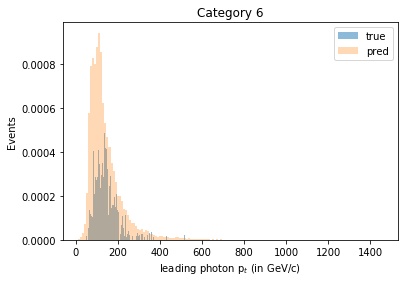

Total number of event in pred hist:  0.0082699
Total number of event in true hist:  0.00834505


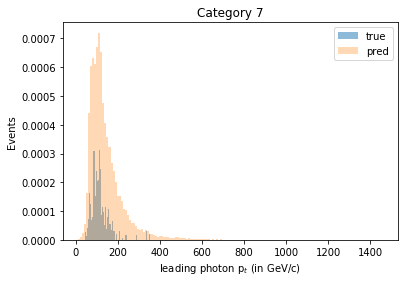

Total number of event in pred hist:  0.00390476
Total number of event in true hist:  0.00345584


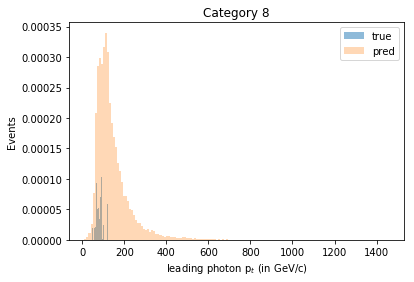

Total number of event in pred hist:  0.00557714
Total number of event in true hist:  0.00592141


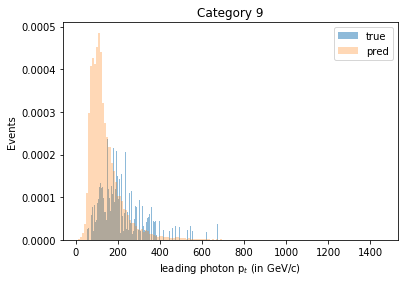

Total number of event in pred hist:  0.0136345
Total number of event in true hist:  0.0132289


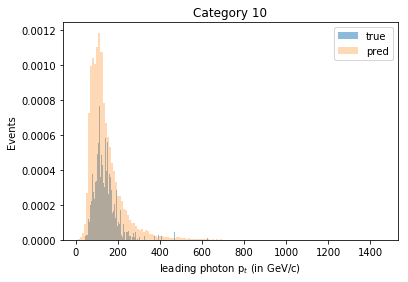

Total number of event in pred hist:  0.0113982
Total number of event in true hist:  0.0113621


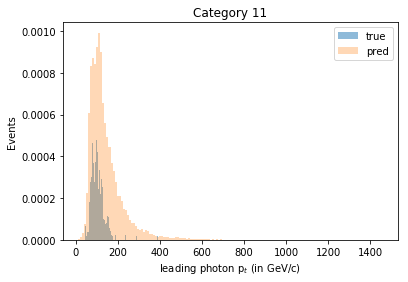

Total number of event in pred hist:  0.00526176
Total number of event in true hist:  0.00526823


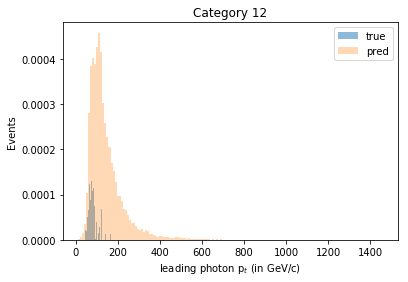

In [44]:
for i in range (0,13):
    cat_true=df[df.cat_true==i]
    plt.hist(cat_true['leadPho_pt'].ravel(),weights=cat_true.w_true.ravel(),bins=150,alpha=0.5,label='true')
    plt.hist(df['leadPho_pt'].ravel(),weights=y_pred_weight[i].ravel(),bins=150,alpha=0.3,label='pred')
    h_true=np.histogram(cat_true['leadPho_pt'].ravel(),weights=cat_true.w_true,bins=150)
    h_pred=np.histogram(df['leadPho_pt'].ravel(),weights=y_pred_weight[i].ravel(),bins=150)
    print "Total number of event in pred hist: ",np.sum(h_pred[0])
    print "Total number of event in true hist: ",np.sum(h_true[0])
    plt.ylabel("Events")
    plt.xlabel("leading photon p$_t$ (in GeV/c)")
    plt.title('Category %d'%i)
    plt.legend()
    plt.show()
    plt.close()

Total number of event in pred hist:  0.59024
Total number of event in true hist:  0.594638


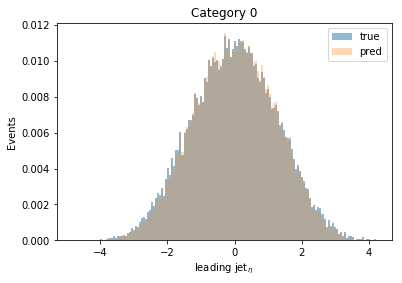

Total number of event in pred hist:  0.0339925
Total number of event in true hist:  0.0318687


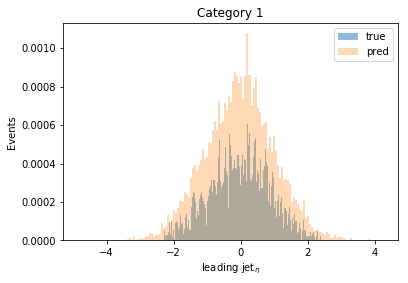

Total number of event in pred hist:  0.0314559
Total number of event in true hist:  0.0305053


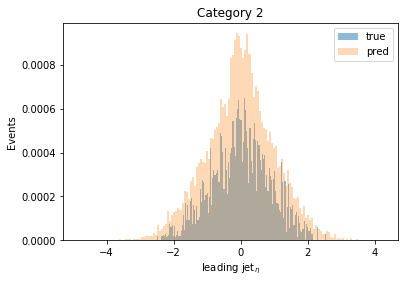

Total number of event in pred hist:  0.0102004
Total number of event in true hist:  0.00991993


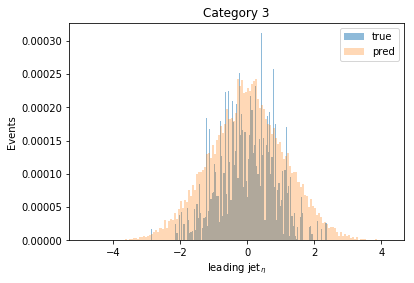

Total number of event in pred hist:  0.00280462
Total number of event in true hist:  0.00279649


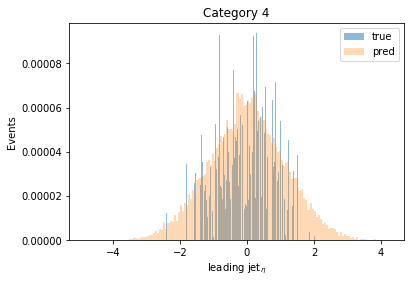

Total number of event in pred hist:  0.0062523
Total number of event in true hist:  0.00593223


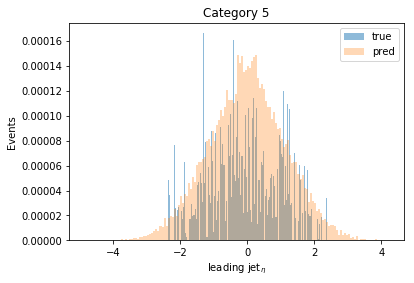

Total number of event in pred hist:  0.0108074
Total number of event in true hist:  0.0105573


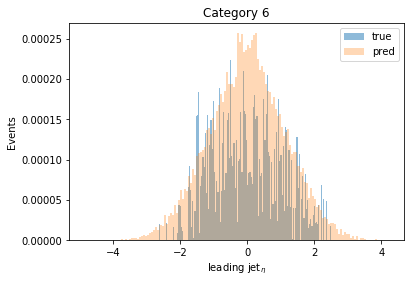

Total number of event in pred hist:  0.0082699
Total number of event in true hist:  0.00834505


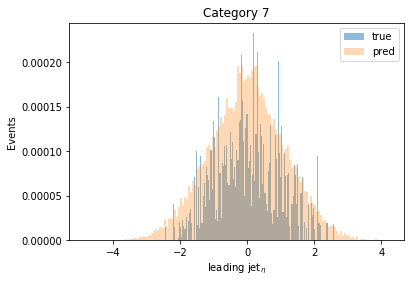

Total number of event in pred hist:  0.00390476
Total number of event in true hist:  0.00345584


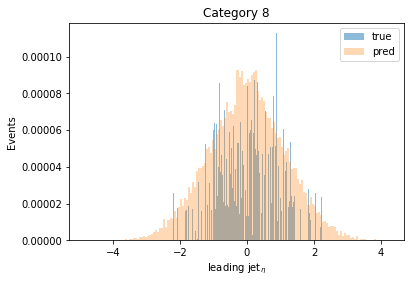

Total number of event in pred hist:  0.00557714
Total number of event in true hist:  0.00592141


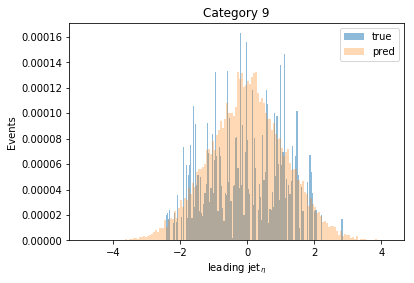

Total number of event in pred hist:  0.0136345
Total number of event in true hist:  0.0132289


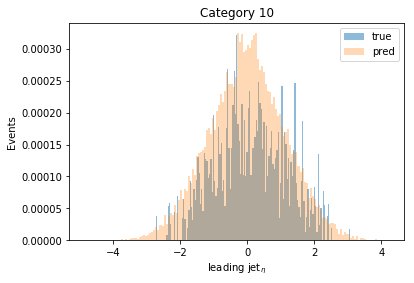

Total number of event in pred hist:  0.0113982
Total number of event in true hist:  0.0113621


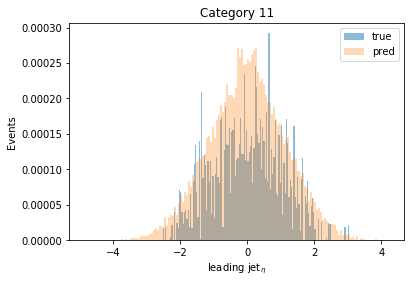

Total number of event in pred hist:  0.00526176
Total number of event in true hist:  0.00526823


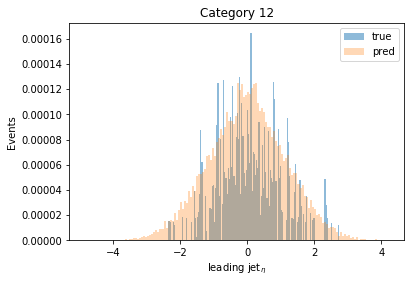

In [45]:
for i in range (0,13):
    cat_true=df[df.cat_true==i]
    plt.hist(cat_true['leadJet_eta'].ravel(),weights=cat_true.w_true.ravel(),bins=150,alpha=0.5,label='true')
    plt.hist(df['leadJet_eta'].ravel(),weights=y_pred_weight[i].ravel(),bins=150,alpha=0.3,label='pred')
    h_true=np.histogram(cat_true['leadJet_eta'].ravel(),weights=cat_true.w_true,bins=150)
    h_pred=np.histogram(df['leadJet_eta'].ravel(),weights=y_pred_weight[i].ravel(),bins=150)
    print "Total number of event in pred hist: ",np.sum(h_pred[0])
    print "Total number of event in true hist: ",np.sum(h_true[0])
    plt.ylabel("Events")
    plt.xlabel("leading jet$_{\eta}$")
    plt.title('Category %d'%i)
    plt.legend()
    plt.show()
    plt.close()

Total number of event in pred hist:  0.59024
Total number of event in true hist:  0.594638


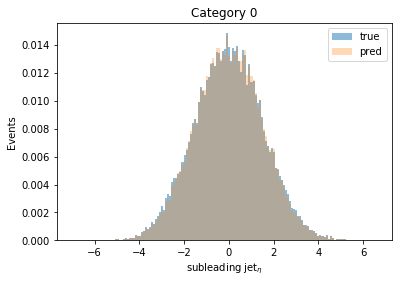

Total number of event in pred hist:  0.0339925
Total number of event in true hist:  0.0318687


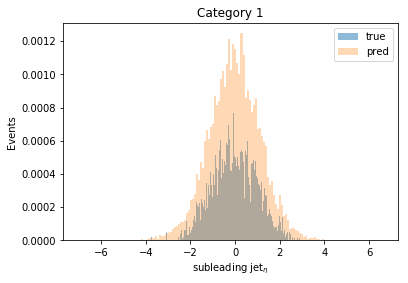

Total number of event in pred hist:  0.0314559
Total number of event in true hist:  0.0305053


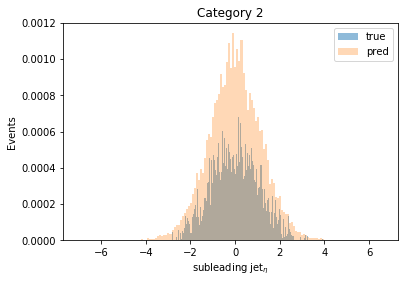

Total number of event in pred hist:  0.0102004
Total number of event in true hist:  0.00991993


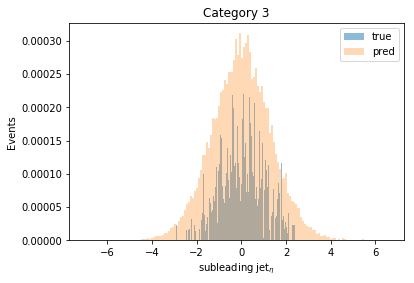

Total number of event in pred hist:  0.00280462
Total number of event in true hist:  0.00279649


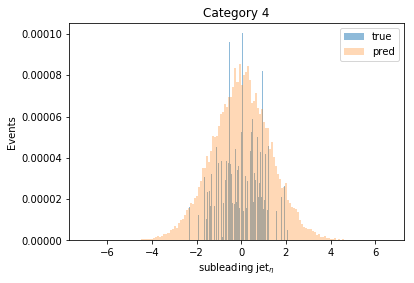

Total number of event in pred hist:  0.0062523
Total number of event in true hist:  0.00593223


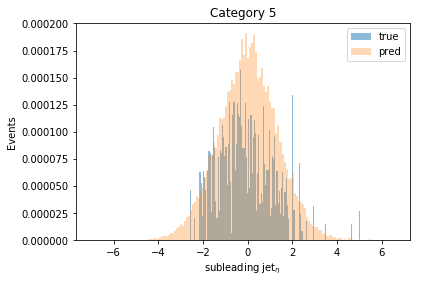

Total number of event in pred hist:  0.0108074
Total number of event in true hist:  0.0105573


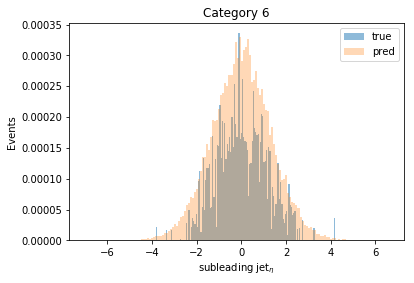

Total number of event in pred hist:  0.00826989
Total number of event in true hist:  0.00834505


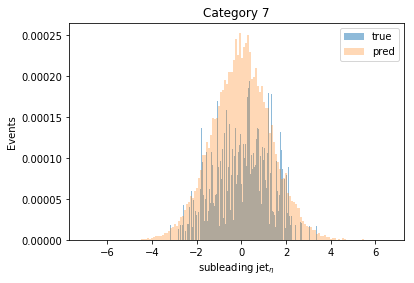

Total number of event in pred hist:  0.00390476
Total number of event in true hist:  0.00345584


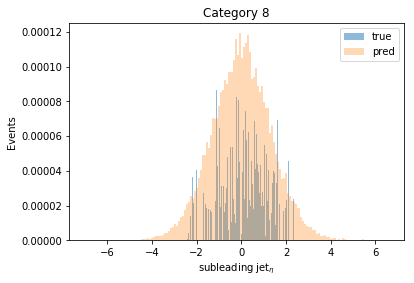

Total number of event in pred hist:  0.00557714
Total number of event in true hist:  0.00592141


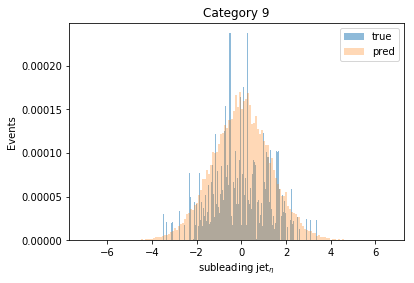

Total number of event in pred hist:  0.0136345
Total number of event in true hist:  0.0132289


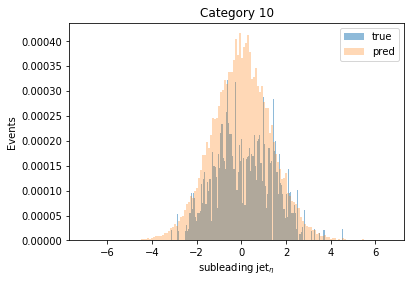

Total number of event in pred hist:  0.0113982
Total number of event in true hist:  0.0113621


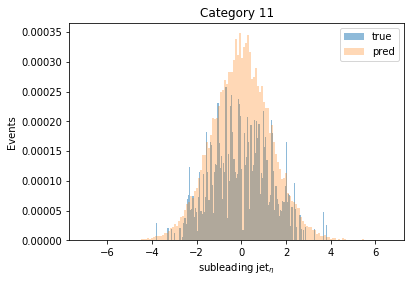

Total number of event in pred hist:  0.00526176
Total number of event in true hist:  0.00526823


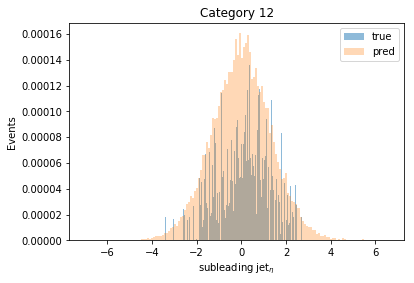

In [46]:
for i in range (0,13):
    cat_true=df[df.cat_true==i]
    plt.hist(cat_true['subleadJet_eta'].ravel(),weights=cat_true.w_true.ravel(),bins=150,alpha=0.5,label='true')
    plt.hist(df['subleadJet_eta'].ravel(),weights=y_pred_weight[i].ravel(),bins=150,alpha=0.3,label='pred')
    h_true=np.histogram(cat_true['subleadJet_eta'].ravel(),weights=cat_true.w_true,bins=150)
    h_pred=np.histogram(df['subleadJet_eta'].ravel(),weights=y_pred_weight[i].ravel(),bins=150)
    print "Total number of event in pred hist: ",np.sum(h_pred[0])
    print "Total number of event in true hist: ",np.sum(h_true[0])
    plt.ylabel("Events")
    plt.xlabel("subleading jet$_{\eta}$")
    plt.title('Category %d'%i)
    plt.legend()
    plt.show()
    plt.close()

Total number of event in pred hist:  0.59024
Total number of event in true hist:  0.594638


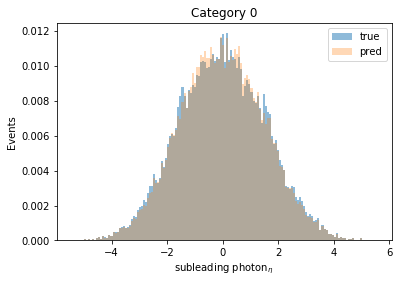

Total number of event in pred hist:  0.0339925
Total number of event in true hist:  0.0318687


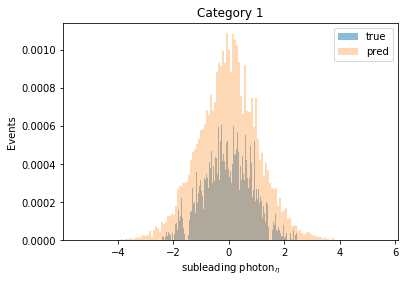

Total number of event in pred hist:  0.0314559
Total number of event in true hist:  0.0305053


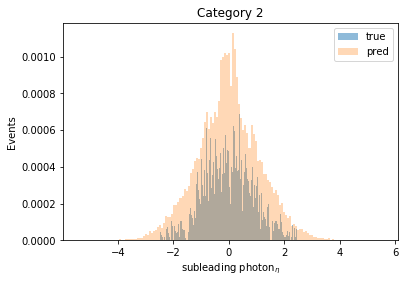

Total number of event in pred hist:  0.0102004
Total number of event in true hist:  0.00991993


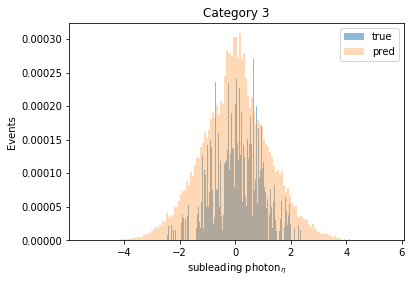

Total number of event in pred hist:  0.00280462
Total number of event in true hist:  0.00279649


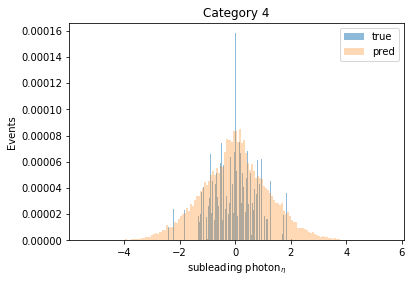

Total number of event in pred hist:  0.0062523
Total number of event in true hist:  0.00593223


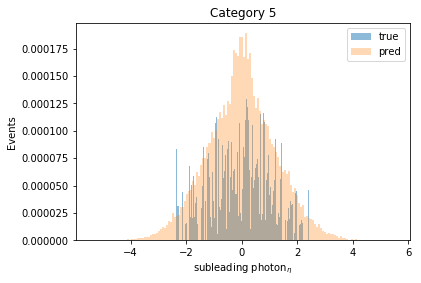

Total number of event in pred hist:  0.0108074
Total number of event in true hist:  0.0105573


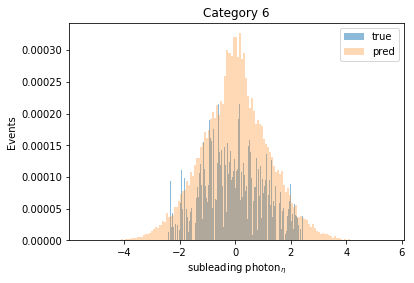

Total number of event in pred hist:  0.0082699
Total number of event in true hist:  0.00834505


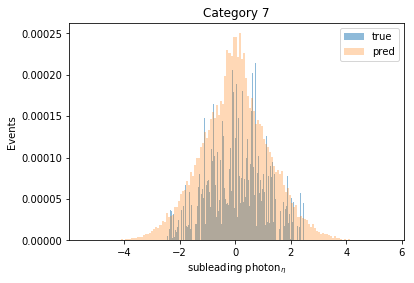

Total number of event in pred hist:  0.00390476
Total number of event in true hist:  0.00345584


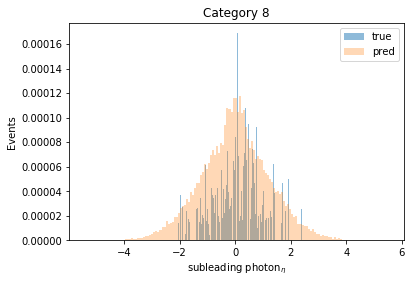

Total number of event in pred hist:  0.00557714
Total number of event in true hist:  0.00592141


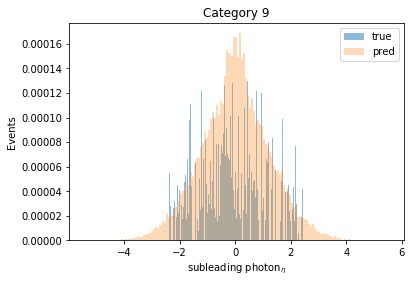

Total number of event in pred hist:  0.0136345
Total number of event in true hist:  0.0132289


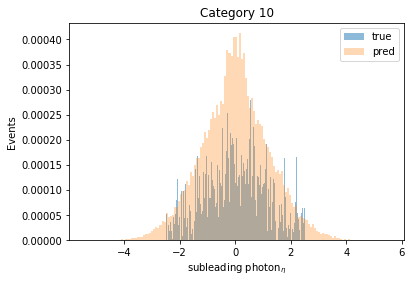

Total number of event in pred hist:  0.0113982
Total number of event in true hist:  0.0113621


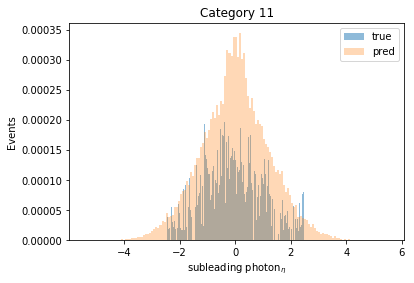

Total number of event in pred hist:  0.00526176
Total number of event in true hist:  0.00526823


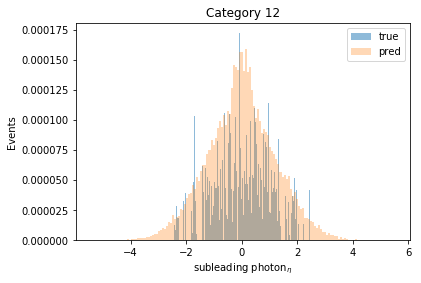

In [47]:
for i in range (0,13):
    cat_true=df[df.cat_true==i]
    plt.hist(cat_true['subleadPho_eta'].ravel(),weights=cat_true.w_true.ravel(),bins=150,alpha=0.5,label='true')
    plt.hist(df['subleadPho_eta'].ravel(),weights=y_pred_weight[i].ravel(),bins=150,alpha=0.3,label='pred')
    h_true=np.histogram(cat_true['subleadPho_eta'].ravel(),weights=cat_true.w_true,bins=150)
    h_pred=np.histogram(df['subleadPho_eta'].ravel(),weights=y_pred_weight[i].ravel(),bins=150)
    print "Total number of event in pred hist: ",np.sum(h_pred[0])
    print "Total number of event in true hist: ",np.sum(h_true[0])
    plt.ylabel("Events")
    plt.xlabel("subleading photon$_{\eta}$")
    plt.title('Category %d'%i)
    plt.legend()
    plt.show()
    plt.close()

Total number of event in pred hist:  0.59024
Total number of event in true hist:  0.594638


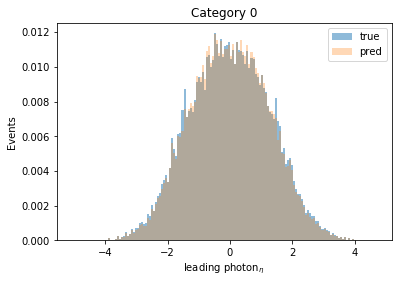

Total number of event in pred hist:  0.0339925
Total number of event in true hist:  0.0318687


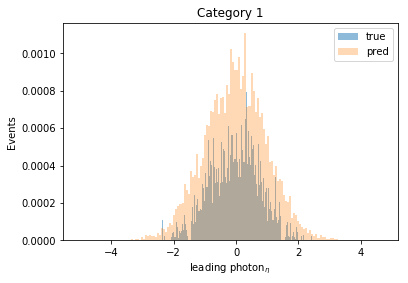

Total number of event in pred hist:  0.0314559
Total number of event in true hist:  0.0305053


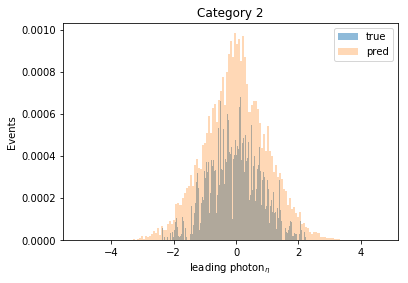

Total number of event in pred hist:  0.0102004
Total number of event in true hist:  0.00991993


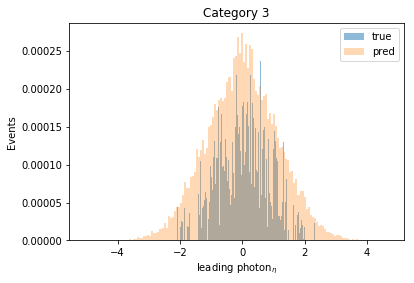

Total number of event in pred hist:  0.00280462
Total number of event in true hist:  0.00279649


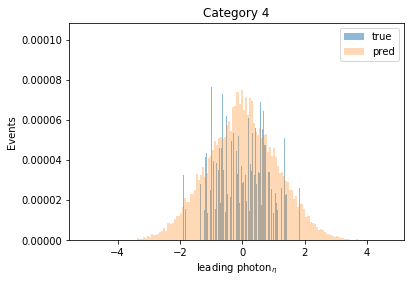

Total number of event in pred hist:  0.0062523
Total number of event in true hist:  0.00593223


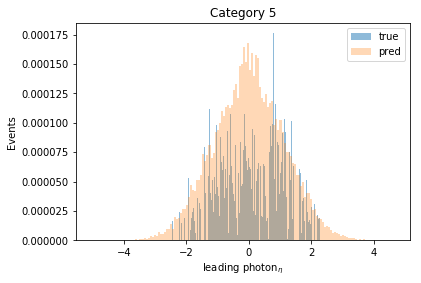

Total number of event in pred hist:  0.0108074
Total number of event in true hist:  0.0105573


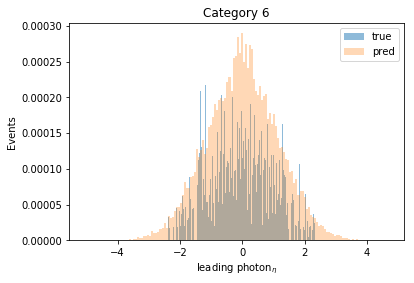

Total number of event in pred hist:  0.0082699
Total number of event in true hist:  0.00834505


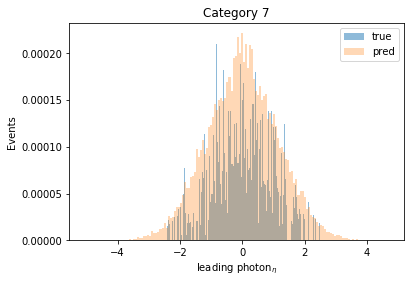

Total number of event in pred hist:  0.00390476
Total number of event in true hist:  0.00345584


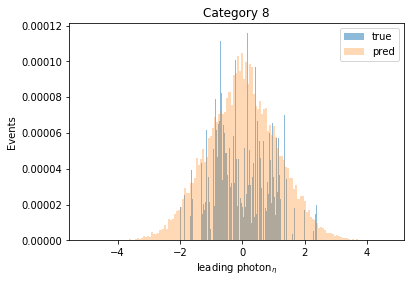

Total number of event in pred hist:  0.00557714
Total number of event in true hist:  0.00592141


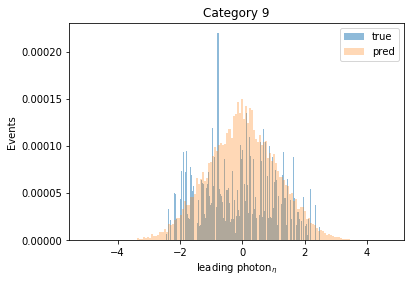

Total number of event in pred hist:  0.0136345
Total number of event in true hist:  0.0132289


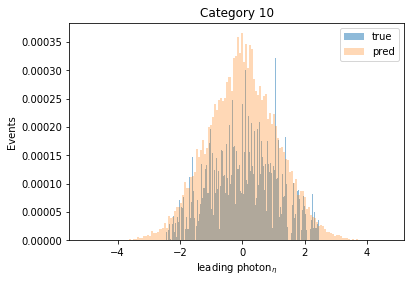

Total number of event in pred hist:  0.0113982
Total number of event in true hist:  0.0113621


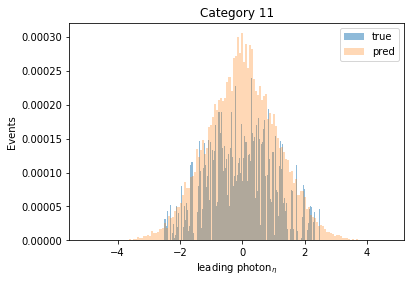

Total number of event in pred hist:  0.00526176
Total number of event in true hist:  0.00526823


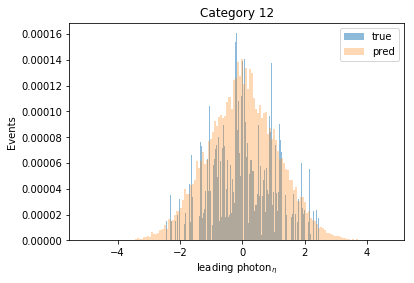

In [48]:
for i in range (0,13):
    cat_true=df[df.cat_true==i]
    plt.hist(cat_true['leadPho_eta'].ravel(),weights=cat_true.w_true.ravel(),bins=150,alpha=0.5,label='true')
    plt.hist(df['leadPho_eta'].ravel(),weights=y_pred_weight[i].ravel(),bins=150,alpha=0.3,label='pred')
    h_true=np.histogram(cat_true['leadPho_eta'].ravel(),weights=cat_true.w_true,bins=150)
    h_pred=np.histogram(df['leadPho_eta'].ravel(),weights=y_pred_weight[i].ravel(),bins=150)
    print "Total number of event in pred hist: ",np.sum(h_pred[0])
    print "Total number of event in true hist: ",np.sum(h_true[0])
    plt.ylabel("Events")
    plt.xlabel("leading photon$_{\eta}$")
    plt.title('Category %d'%i)
    plt.legend()
    plt.show()
    plt.close()